# Credit Card Transactions Fraud Detection

### Problem Statement

This is a simulated data set taken from the Kaggle website and contains both legitimate and fraudulent transactions. You can download the data set using this link.
https://www.kaggle.com/kartik2112/fraud-detection

 

The data set contains credit card transactions of around 1,000 cardholders with a pool of 800 merchants from 1 Jan 2019 to 31 Dec 2020. It contains a total of 18,52,394 transactions, out of which 9,651 are fraudulent transactions. The data set is highly imbalanced, with the positive class (frauds) accounting for 0.52% of the total transactions. Now, since the data set is highly imbalanced, it needs to be handled before model building. The feature 'amt' represents the transaction amount. The feature 'is_fraud' represents class labelling and takes the value 1 the transaction is a fraudulent transaction and 0, otherwise.

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Train data import
df = pd.read_csv('fraudTrain.csv')
df_Test = pd.read_csv('fraudTest.csv')

In [3]:
df = df.drop(columns='Unnamed: 0')
df_Test = df_Test.drop(columns='Unnamed: 0')

In [4]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [6]:
df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [5]:
df.shape

(1296675, 22)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [7]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

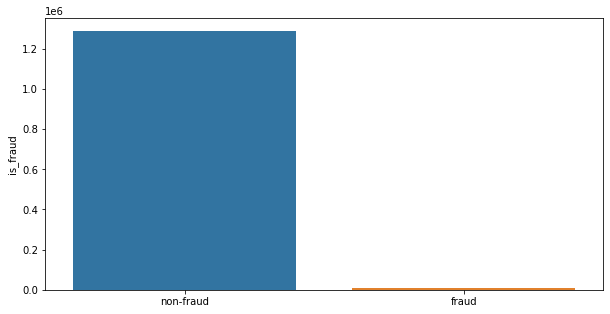

The dataset contains 1289169 of non-fraud cases and 7506 of fraud cases the ratio to fraud and non-fraud is 0.58 %


In [9]:
# Checking Fradulent and non-Fradulent ratio
plt.figure(figsize=(10,5))

a = df.is_fraud.value_counts()

labels = ['non-fraud', 'fraud']

sns.barplot(x=labels, y= a, data= df)
plt.show()

print('The dataset contains {} of non-fraud cases and {} of fraud cases the ratio to fraud and non-fraud is {} %'.
      format(a[0], a[1], round(((a[1]/a[0])*100),2)))

In [10]:
# converting the columns to date-time format
df.trans_date_trans_time = pd.to_datetime(df.trans_date_trans_time)
df.dob = pd.to_datetime(df.dob)

In [11]:
# converting the columns to date-time format in test data
df_Test.trans_date_trans_time = pd.to_datetime(df_Test.trans_date_trans_time)
df_Test.dob = pd.to_datetime(df_Test.dob)

In [12]:
# Creating a new column Cust_age which is taken by subtracting Date of transaction and DOB in Train data
df['cust_age'] = (pd.DatetimeIndex(df.trans_date_trans_time). year) - (pd.DatetimeIndex(df.dob).year)

In [13]:
# Creating a new column Cust_age which is taken by subtracting Date of transaction and DOB in Test data
df_Test['cust_age'] = (pd.DatetimeIndex(df_Test.trans_date_trans_time).year) - (pd.DatetimeIndex(df_Test.dob).year)

In [14]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,cust_age
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,31
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,41
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,57
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,52
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,33


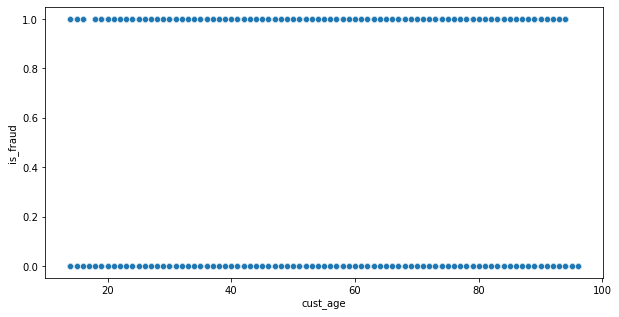

In [16]:
# Checking on Age Group
plt.figure(figsize=(10,5))
sns.scatterplot(x=df.cust_age, y= df.is_fraud, data=df )
plt.show()

#### > All age group suffers from Fraud Activities

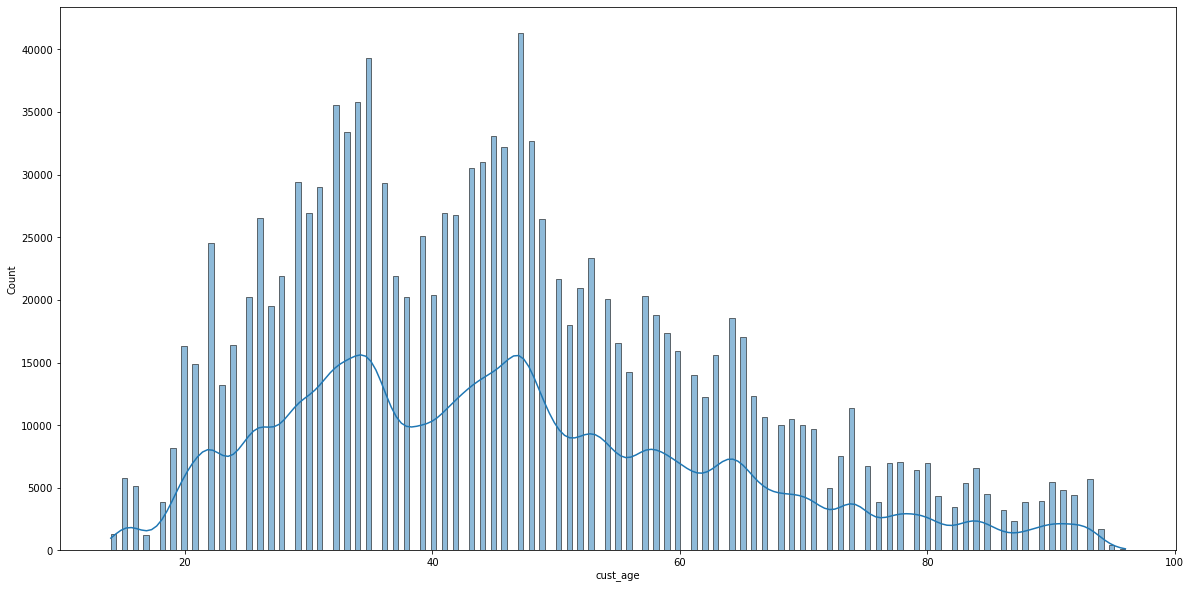

In [15]:
plt.figure(figsize=(20,10))
sns.histplot(data = df, x = df.cust_age, kde=True)
plt.show()

#### > The age group of 25-50 people do transaction more compare to other age group.

In [16]:
# Extracting the month, day name, Hour and week day of transaction
df['month'] = pd.DatetimeIndex(df.trans_date_trans_time).month
df['day_name'] = df.trans_date_trans_time.dt.day_name()
df['hour'] = pd.DatetimeIndex(df.trans_date_trans_time).hour
df['weekday'] = pd.DatetimeIndex(df.trans_date_trans_time).weekday #The day of the week with Monday=0, Sunday=6.

In [17]:
# Extracting the month, day name, Hour and week day of transaction
df_Test['month'] = pd.DatetimeIndex(df_Test.trans_date_trans_time).month
df_Test['day_name'] = df_Test.trans_date_trans_time.dt.day_name()
df_Test['hour'] = pd.DatetimeIndex(df_Test.trans_date_trans_time).hour
df_Test['weekday'] = pd.DatetimeIndex(df_Test.trans_date_trans_time).weekday #The day of the week with Monday=0, Sunday=6.

In [19]:
df_Test.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,trans_num,unix_time,merch_lat,merch_long,is_fraud,cust_age,month,day_name,hour,weekday
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,52,6,Sunday,12,6
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,30,6,Sunday,12,6
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,50,6,Sunday,12,6
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,33,6,Sunday,12,6
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,65,6,Sunday,12,6


In [20]:
# Instanciating the fraud and non-fraud transactions 
fraud_df = df.loc[ df['is_fraud'] == 1 ]
not_fraud_df = df.loc[ df['is_fraud'] == 0 ]

**************************************************


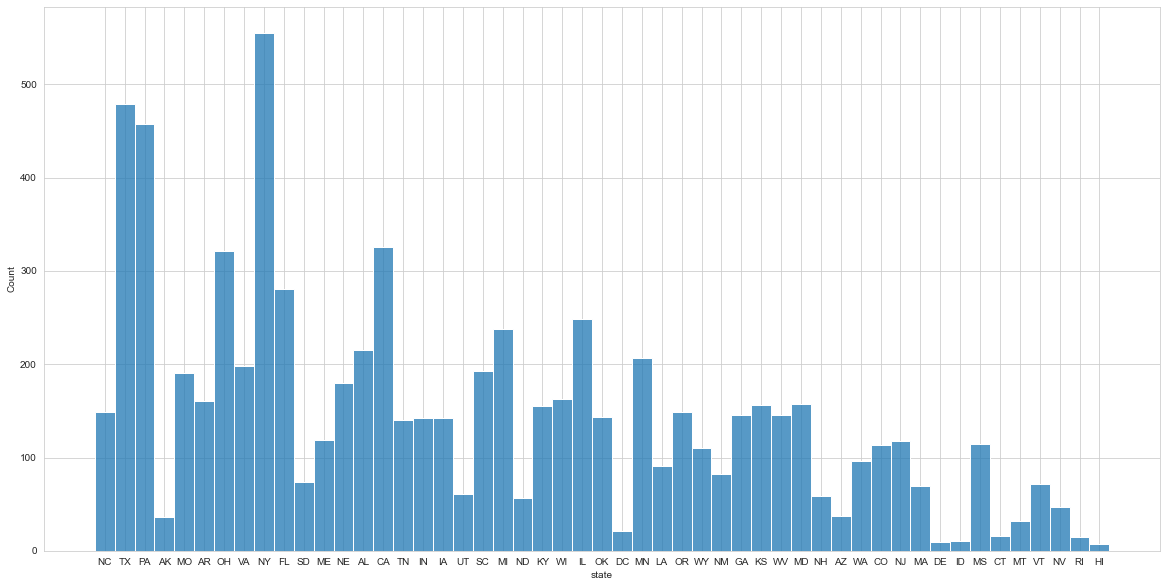

highest frauds in states 
 NY    555
TX    479
PA    458
CA    326
OH    321
Name: state, dtype: int64
----------------------------------------
lowest frauds in states 
 HI     7
DE     9
ID    11
RI    15
CT    16
Name: state, dtype: int64
**************************************************


In [22]:
#Highest frauds and lowest fraud states
print('*'*50)

sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
sns.histplot(data=fraud_df, x=fraud_df.state)
plt.show()

print('highest frauds in states \n',fraud_df.state.value_counts(ascending=False).head(5))
print('-'*40)
print('lowest frauds in states \n',fraud_df.state.value_counts(ascending=True).head(5))

print('*'*50)

In [21]:
df.category.unique()

array(['misc_net', 'grocery_pos', 'entertainment', 'gas_transport',
       'misc_pos', 'grocery_net', 'shopping_net', 'shopping_pos',
       'food_dining', 'personal_care', 'health_fitness', 'travel',
       'kids_pets', 'home'], dtype=object)

**************************************************


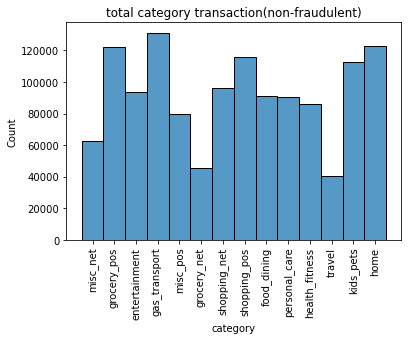

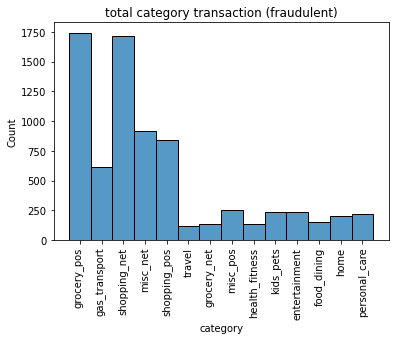

**************************************************


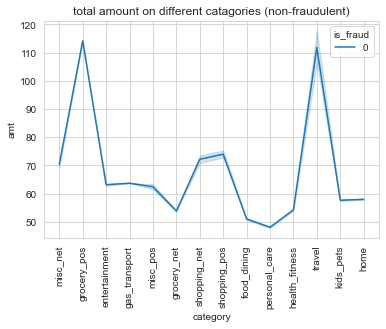

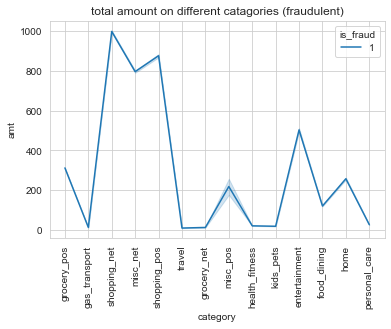

**************************************************
M    3771
F    3735
Name: gender, dtype: int64


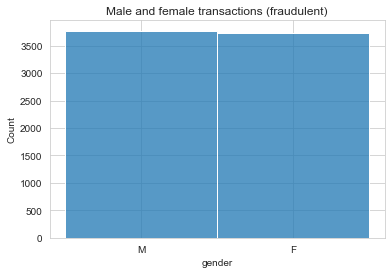

**************************************************


In [22]:
print('*'*50)

plt.title('total category transaction(non-fraudulent)')
sns.histplot(data = not_fraud_df, x = not_fraud_df.category)
plt.xticks(rotation = 90)
plt.show()

# print(not_fraud_df.category.value_counts())

plt.title('total category transaction (fraudulent)')
sns.histplot(data = fraud_df, x = fraud_df.category)
plt.xticks(rotation = 90)
plt.show()

# print(fraud_df.category.value_counts())

print('*'*50)

sns.set_style("whitegrid")
plt.title('total amount on different catagories (non-fraudulent)')
sns.lineplot(data = not_fraud_df, x = not_fraud_df.category, y=not_fraud_df.amt, hue=not_fraud_df.is_fraud, style='is_fraud' )
plt.xticks(rotation = 90)
plt.show()

sns.set_style("whitegrid")
plt.title('total amount on different catagories (fraudulent)')
sns.lineplot(data = fraud_df, x = fraud_df.category, y=fraud_df.amt, hue=fraud_df.is_fraud, style='is_fraud' )
plt.xticks(rotation = 90)
plt.show()

print('*'*50)

classes = fraud_df.gender.value_counts()
print(classes)
plt.title('Male and female transactions (fraudulent)')
sns.histplot(data=fraud_df, x="gender")
plt.show()

print('*'*50)

### Observations:
1. shopping_net, groceries_pos, mics_net, and shopping_pos has the most fraudelent transaction catogory.
2. travel and groceries_pos are the catogories where amount spent on non-fraudelent transaction is maximum.
3. Frauds happen more slightly more in males compare to females.

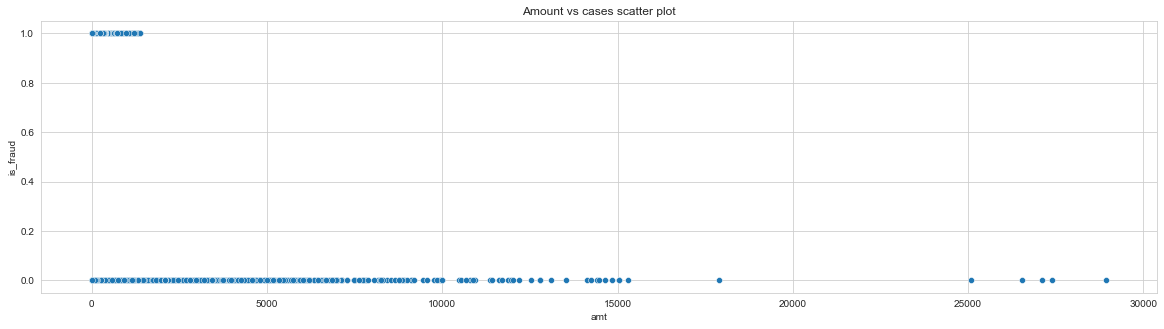

In [23]:
# Create a scatter plot to observe the distribution of cases with Amount
plt.figure(figsize=(20,5))
sns.scatterplot(df["amt"], df["is_fraud"])
plt.title("Amount vs cases scatter plot")
plt.show()

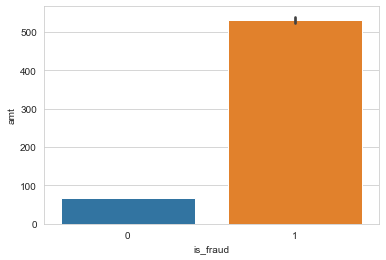

is_fraud
0    8.723434e+07
1    3.988089e+06
Name: amt, dtype: float64
****************************************
Out of total amount 91222428.9 $, 3988088.61 $ has been fraudulent and i.e 4.0% of total


In [24]:
# bar plot to show the fraud/non-fraud transactional amount 
sns.barplot(data=df, x=df.is_fraud, y=df.amt)
plt.show()
print(df.groupby(['is_fraud']).amt.sum())
print('*'*40)

f = round((fraud_df.amt.sum()/df.amt.sum()),2)*100
nf = round((not_fraud_df.amt.sum()/df.amt.sum()),2)*100
print('Out of total amount {} $, {} $ has been fraudulent and i.e {}% of total'.format((df.amt.sum()),round((fraud_df.amt.sum()),2),f))

#### > 4% of wealth is effected by frauds.


**************************************************


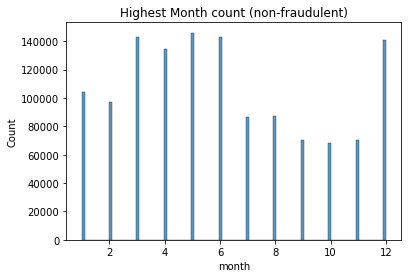

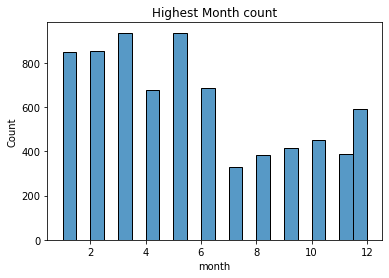

**************************************************


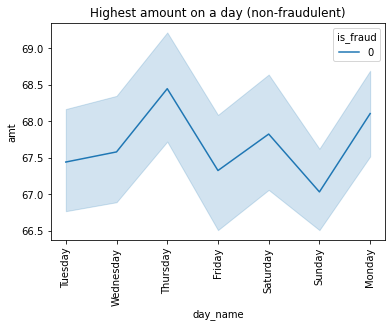

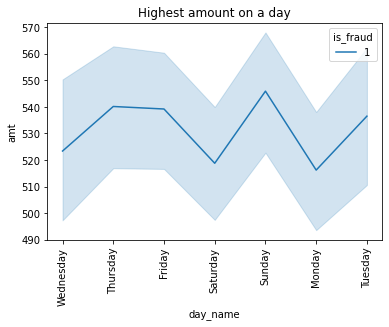

**************************************************


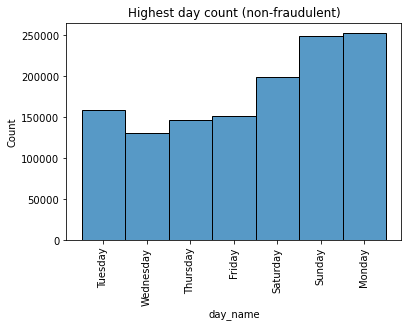

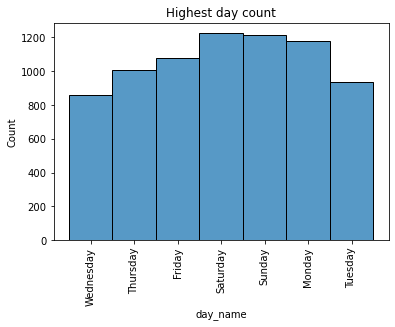

**************************************************


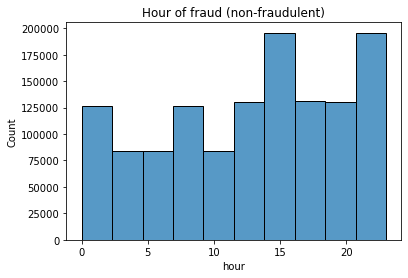

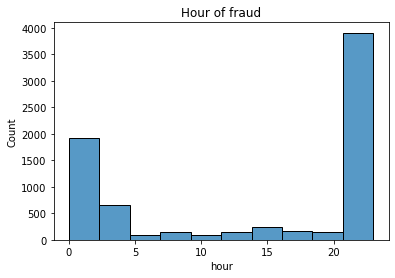

**************************************************


In [20]:
# Plots to see some basic non-fraudulent VS fraudulent transaction details from the dataset

print('*'*50)

plt.title('Highest Month count (non-fraudulent)')
sns.histplot(data = not_fraud_df, x = not_fraud_df.month)
plt.show()

plt.title('Highest Month count')
sns.histplot(data = fraud_df, x = fraud_df.month)
plt.show()

print('*'*50)

plt.title('Highest amount on a day (non-fraudulent)')
sns.lineplot(data = not_fraud_df, x = not_fraud_df.day_name, y=not_fraud_df.amt, hue=not_fraud_df.is_fraud, style='is_fraud' )
plt.xticks(rotation = 90)
plt.show()

plt.title('Highest amount on a day')
sns.lineplot(data = fraud_df, x = fraud_df.day_name, y=fraud_df.amt, hue=fraud_df.is_fraud, style='is_fraud' )
plt.xticks(rotation = 90)
plt.show()

print('*'*50)

plt.title('Highest day count (non-fraudulent)')
sns.histplot(data = not_fraud_df, x = not_fraud_df.day_name, bins=10)
plt.xticks(rotation = 90)
plt.show()

plt.title('Highest day count')
sns.histplot(data = fraud_df, x = fraud_df.day_name, bins=10)
plt.xticks(rotation = 90)
plt.show()

print('*'*50)

plt.title('Hour of fraud (non-fraudulent)')
sns.histplot(data = not_fraud_df, x = not_fraud_df.hour, bins=10)
plt.show()

plt.title('Hour of fraud')
sns.histplot(data = fraud_df, x = fraud_df.hour, bins=10)
plt.show()

print('*'*50)

#### Observation
1. April to july and december month has the highest no. of tranaction.
2. 1st and 2nd quarter of the year has the most no, of fraudulent transaction and than it drops drastically.
3. Sunday, Monday and tuesday have more transaction.
4. Most of the fraudulent transaction happens on weekends.
5. Most of the fradulent transaction happens at night time between 10 pm to 2:30 am.
6. On Sunday transactions occurs on less amount of money, and also on this day, the maximum money has been stolen the following Tuesday and Thursday.

In [23]:
print(not_fraud_df.category.value_counts())

gas_transport     131041
home              122917
grocery_pos       121895
shopping_pos      115829
kids_pets         112796
shopping_net       95830
entertainment      93781
food_dining        91310
personal_care      90538
health_fitness     85746
misc_pos           79405
misc_net           62372
grocery_net        45318
travel             40391
Name: category, dtype: int64


In [24]:
fraud_df.columns
df.shape

(1296675, 27)

In [27]:
# Converting gender values from M & F to 0 & 1
def gender_01(x):
    if x == 'F':
        return 1
    if x == 'M':
        return 0

# gender mapping on data set
df['gender'] = df['gender'].transform(gender_01)

# splitting full dat sets in 2 groups, numerical and categorical 
# this dataset has 1296675 rows, so in order to save computational power 
num_values = df.loc[:,df.dtypes!=np.object]

num_obj = df.loc[:,df.dtypes==np.object]


# gender mapping on data set
df_Test['gender'] = df_Test['gender'].transform(gender_01)

# splitting full dat sets in 2 groups, numerical and categorical 
num_values_test = df_Test.loc[:,df_Test.dtypes!=np.object]

num_obj_test = df_Test.loc[:,df_Test.dtypes==np.object]

In [28]:
num_values.head()

,trans_date_trans_time,cc_num,amt,gender,zip,lat,long,city_pop,dob,unix_time,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2019-01-01 00:00:18,2703186189652095,4.97,1,28654,36.0788,-81.1781,3495,1988-03-09,1325376018,...,0,0,0,0,1,0,0,0,0,0
1,2019-01-01 00:00:44,630423337322,107.23,1,99160,48.8878,-118.2105,149,1978-06-21,1325376044,...,1,0,0,0,0,0,0,0,0,0
2,2019-01-01 00:00:51,38859492057661,220.11,0,83252,42.1808,-112.2620,4154,1962-01-19,1325376051,...,0,0,0,0,0,0,0,0,0,0
3,2019-01-01 00:01:16,3534093764340240,45.00,0,59632,46.2306,-112.1138,1939,1967-01-12,1325376076,...,0,0,0,0,0,0,0,0,0,0
4,2019-01-01 00:03:06,375534208663984,41.96,0,24433,38.4207,-79.4629,99,1986-03-28,1325376186,...,0,0,0,0,0,1,0,0,0,0


In [29]:
#Dropping 'cc_num' column as it wont be needed
num_values = num_values.drop(columns='cc_num')

In [30]:
#Dropping 'cc_num' column as it wont be needed in test data
num_values_test = num_values_test.drop(columns='cc_num')

# Model Evaluation

### Train test split

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
num_obj.columns

Index(['merchant', 'first', 'last', 'street', 'city', 'state', 'job',
       'trans_num', 'day_name'],
      dtype='object')

In [33]:
# splitting the columns to get target variable and predictor variable and dropping some unnecessary columns 

y = num_values.is_fraud
X = num_values.drop(columns=['zip','lat', 'long','merch_lat', 'merch_long','is_fraud',
                             'trans_date_trans_time', 'unix_time', 'dob'])
# X.columns

yTestCsv = num_values_test.is_fraud
XTestCsv = num_values_test.drop(columns=['zip','lat', 'long','merch_lat', 'merch_long','is_fraud',
                                         'trans_date_trans_time', 'unix_time', 'dob'])

In [34]:
print(X.columns, '\n', XTestCsv.columns)

Index(['amt', 'gender', 'city_pop', 'cust_age', 'month', 'hour', 'weekday',
       'category_entertainment', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel'],
      dtype='object') 
 Index(['amt', 'gender', 'city_pop', 'cust_age', 'month', 'hour', 'weekday'], dtype='object')


<Figure size 1440x432 with 0 Axes>

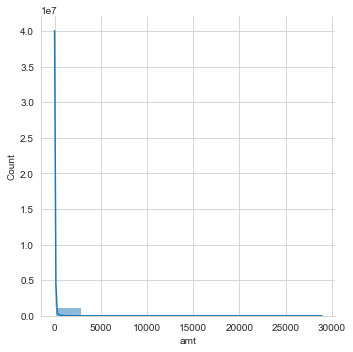

<Figure size 1440x432 with 0 Axes>

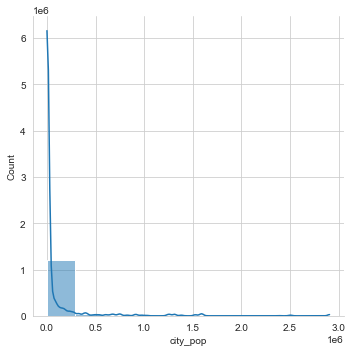

In [35]:
plt.figure(figsize=[20,6])
sns.displot(X.amt, bins=10, kde=True)

plt.figure(figsize=[20,6])
sns.displot(X.city_pop, bins=10, kde=True)


plt.show()

In [36]:
X['amt'] = np.log(X['amt'])
X['city_pop'] = np.log(X['city_pop'])

<Figure size 1440x432 with 0 Axes>

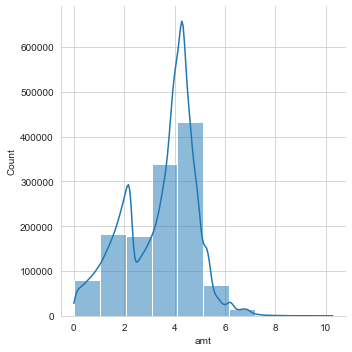

<Figure size 1440x432 with 0 Axes>

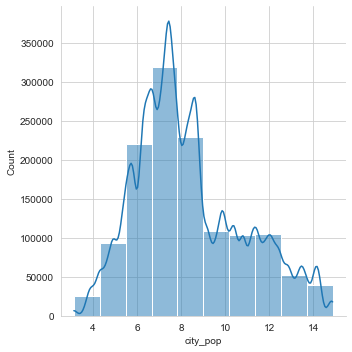

In [37]:
plt.figure(figsize=[20,6])
sns.displot(X.amt, bins=10, kde=True)

plt.figure(figsize=[20,6])
sns.displot(X.city_pop, bins=10, kde=True)

plt.show()

In [38]:
# Splitting the data in 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42,stratify=y)
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

In [55]:
print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(1296675, 22) (907672, 22) (389003, 22)
(1296675,) (907672,) (389003,)


In [39]:
# Scoring parameters 
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, average_precision_score, precision_recall_curve, classification_report 


# AUC-ROC 
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

In [40]:
# Hyperparameter tuning using cross validation (GridSearchCV) 
from sklearn.model_selection import GridSearchCV

In [41]:
#giving the parameters to the GridSearchCV to fit models on it and find the best fit model

params = {'criterion' : ['gini', 'entropy'],           
          'max_depth': [7],         
          'min_samples_leaf': [40,45,50,55,60,65] 
          }

In [42]:
# Making helper function for model performance
def eval_model(dt_classifiers):
    y_train_pred = dt_classifiers.predict(X_train)
    y_test_pred = dt_classifiers.predict(X_test)
    print('Train set perforance')
    print('accuracy_score - \t',accuracy_score(y_train,y_train_pred))
    print('recall_score - \t',recall_score(y_train,y_train_pred))
    print('f1_score - \t',f1_score(y_train,y_train_pred))
    print('confusion_matrix - \n',confusion_matrix(y_train,y_train_pred))
    print('--'*40)
    print('Test set perforance')
    print('accuracy_score - \t',accuracy_score(y_test,y_test_pred))
    print('recall_score - \t',recall_score(y_test,y_test_pred))
    print('f1_score - \t',f1_score(y_test,y_test_pred))
    print('confusion_matrix - \n',confusion_matrix(y_test,y_test_pred))

In [43]:
# ROC Curve function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [44]:
gsCV = GridSearchCV(estimator=dt,
            param_grid=params,
            n_jobs=-1,
            cv=5,
            verbose=1,
            scoring='accuracy')

In [45]:
from imblearn.over_sampling import SMOTE

In [46]:
smt = SMOTE(random_state=42)
X_train_SMT,y_train_SMT=smt.fit_resample(X_train,y_train)

In [47]:
X_train_SMT.shape, y_train_SMT.shape

((1804836, 21), (1804836,))

In [48]:
#Creating helper functions to evaluate model performance for smote model
def eval_model_smt(dt_classifiers):
    y_train_pred = dt_classifiers.predict(X_train_SMT)
    y_test_pred = dt_classifiers.predict(X_test)
    print('Train set perforance')
    print('accuracy_score - \t',accuracy_score(y_train_SMT,y_train_pred))
    print('recall_score - \t',recall_score(y_train_SMT,y_train_pred))
    print('f1_score - \t',f1_score(y_train_SMT,y_train_pred))
    print('confusion_matrix - \n',confusion_matrix(y_train_SMT,y_train_pred))
    print('--'*40)
    print('Test set perforance')
    print('accuracy_score - \t',accuracy_score(y_test,y_test_pred))
    print('recall_score - \t',recall_score(y_test,y_test_pred))
    print('f1_score - \t',f1_score(y_test,y_test_pred))
    print('confusion_matrix - \n',confusion_matrix(y_test,y_test_pred))


In [49]:
from imblearn.over_sampling import ADASYN

In [50]:
ada = ADASYN(random_state=42)
X_train_ada,y_train_ada=ada.fit_resample(X_train,y_train)

In [51]:
X_train_ada.shape,y_train_ada.shape

((1805316, 21), (1805316,))

In [52]:
#Creating helper function to evaluate model performance for adasyn model
# Making helper function for model performance
def eval_model_ada(dt_classifiers):
    y_train_pred = dt_classifiers.predict(X_train_ada)
    y_test_pred = dt_classifiers.predict(X_test)
    print('Train set perforance')
    print('accuracy_score - \t',accuracy_score(y_train_ada,y_train_pred))
    print('recall_score - \t',recall_score(y_train_ada,y_train_pred))
    print('f1_score - \t',f1_score(y_train_ada,y_train_pred))
    print('confusion_matrix - \n',confusion_matrix(y_train_ada,y_train_pred))
    print('--'*40)
    print('Test set perforance')
    print('accuracy_score - \t',accuracy_score(y_test,y_test_pred))
    print('recall_score - \t',recall_score(y_test,y_test_pred))
    print('f1_score - \t',f1_score(y_test,y_test_pred))
    print('confusion_matrix - \n',confusion_matrix(y_test,y_test_pred))


### Logistic Regression 

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

In [54]:
scaler = MinMaxScaler()

In [55]:
X_scaler = scaler.fit_transform(X_train)
# scaler.data_max_

XScaler = pd.DataFrame(X_scaler, columns= X_train.columns)

In [56]:
XScaler.describe()

,amt,gender,city_pop,cust_age,month,hour,weekday,category_entertainment,category_food_dining,category_gas_transport,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
count,907672.000000,907672.000000,907672.000000,907672.000000,907672.000000,907672.000000,907672.000000,907672.000000,907672.000000,907672.000000,...,907672.000000,907672.000000,907672.000000,907672.000000,907672.000000,907672.000000,907672.000000,907672.000000,907672.000000,907672.000000
mean,0.338385,0.546463,0.444534,0.390598,0.467487,0.557008,0.511918,0.072613,0.070724,0.101804,...,0.095182,0.066187,0.094954,0.087079,0.048569,0.061455,0.070036,0.075271,0.089833,0.031300
std,0.135762,0.497837,0.208781,0.211927,0.310628,0.296449,0.366391,0.259501,0.256363,0.302391,...,0.293466,0.248609,0.293151,0.281951,0.214966,0.240163,0.255208,0.263828,0.285943,0.174127
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.221962,0.000000,0.295607,0.231707,0.181818,0.304348,0.166667,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.377921,1.000000,0.397615,0.365854,0.454545,0.608696,0.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.432530,1.000000,0.577530,0.524390,0.727273,0.826087,0.833333,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
logReg = LogisticRegression()
logReg.fit(XScaler, y_train)

LogisticRegression()

In [58]:
#perform Hyperparameter tuning

params_logreg = {"C" : np.logspace(-3,3,7),
                "penalty" : ["l2"]}

lgReg_CV = GridSearchCV(logReg,
                       params_logreg,
                       scoring= 'roc_auc',
                       cv=3)

lgReg_CV.fit(XScaler, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l2']},
             scoring='roc_auc')

In [59]:
# Printing the best parameters
print(lgReg_CV.best_score_)
print(lgReg_CV.best_params_)
print(lgReg_CV.best_estimator_)
print(lgReg_CV.best_index_)
lg_cvResults = pd.DataFrame(lgReg_CV.cv_results_)

0.8332548946995884
{'C': 1000.0, 'penalty': 'l2'}
LogisticRegression(C=1000.0)
6


In [60]:
lg_cvResults

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.966052,0.026450,0.111485,0.003948,0.001,l2,"{'C': 0.001, 'penalty': 'l2'}",0.787020,0.777597,0.785278,0.783298,0.004094,7
1,1.525744,0.077596,0.102123,0.000959,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.805954,0.797460,0.805061,0.802825,0.003811,6
2,2.570768,0.206279,0.117012,0.008482,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.824549,0.818571,0.825129,0.822749,0.002964,5
3,3.252835,0.360894,0.108336,0.016048,1.0,l2,"{'C': 1.0, 'penalty': 'l2'}",0.832974,0.828090,0.834267,0.831777,0.002660,4
4,3.380254,0.437996,0.106999,0.006378,10.0,l2,"{'C': 10.0, 'penalty': 'l2'}",0.834169,0.829517,0.835632,0.833106,0.002607,3
5,2.034221,0.057476,0.108995,0.006683,100.0,l2,"{'C': 100.0, 'penalty': 'l2'}",0.834287,0.829662,0.835774,0.833241,0.002602,2
6,2.026670,0.065255,0.107378,0.004431,1000.0,l2,"{'C': 1000.0, 'penalty': 'l2'}",0.834300,0.829676,0.835788,0.833255,0.002603,1


Train set perforance
accuracy_score - 	 0.006504552305238016
recall_score - 	 0.9933384088313666
f1_score - 	 0.011442590818302007
confusion_matrix - 
 [[   685 901733]
 [    35   5219]]
--------------------------------------------------------------------------------
Test set perforance
accuracy_score - 	 0.006634910270614879
recall_score - 	 0.9955595026642984
f1_score - 	 0.01147078837367551
confusion_matrix - 
 [[   339 386412]
 [    10   2242]]


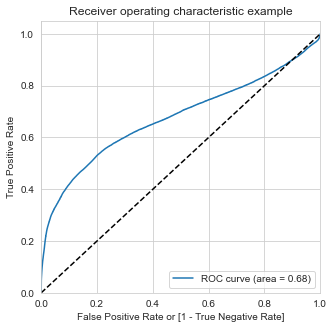

--------------------------------------------------------------------------------


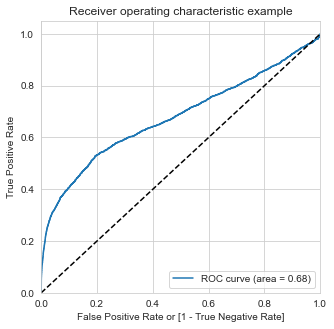

In [61]:
# Logistic regression with optimal C

logReg = LogisticRegression(C=0.001, penalty = 'l2')
logReg.fit(XScaler, y_train)

eval_model(logReg)

# ROC on Train

yTrainPredProba = logReg.predict_proba(X_train_SMT)[:,1]

draw_roc(y_train_SMT, yTrainPredProba)

print('--'*40)

# ROC on Test

yTrainPredProba = logReg.predict_proba(X_test)[:,1]

draw_roc(y_test, yTrainPredProba)

#### Logistic regression on SMOTE

In [62]:
logRegSmt = LogisticRegression()
logRegSmt.fit(X_train_SMT, y_train_SMT)

LogisticRegression()

In [70]:
#perform Hyperparameter tuning

params_logreg = {"C" : np.logspace(-3,3,7),
                "penalty" : ["l2"]}

lgReg_CV = GridSearchCV(estimator=logRegSmt,
                       param_grid= params_logreg,
                       scoring= 'recall',
                       n_jobs=-1,
                       cv=5,
                       verbose=1,
                       return_train_score=True)

lgReg_CV.fit(X_train_SMT, y_train_SMT)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l2']},
             return_train_score=True, scoring='recall', verbose=1)

In [71]:
# Printing the best parameters
print(lgReg_CV.best_score_)
print(lgReg_CV.best_params_)
print(lgReg_CV.best_estimator_)
print(lgReg_CV.best_index_)
lg_cvResults = pd.DataFrame(lgReg_CV.cv_results_)

0.8747742081362844
{'C': 0.01, 'penalty': 'l2'}
LogisticRegression(C=0.01)
1


In [72]:
lg_cvResults

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,43.058325,1.942833,0.787821,0.102288,0.001,l2,"{'C': 0.001, 'penalty': 'l2'}",0.854608,0.869484,0.836106,...,0.851839,0.010747,4,0.858973,0.868298,0.835320,0.849431,0.847392,0.851883,0.011138
1,46.642552,2.826324,0.943944,0.264671,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.881114,0.884532,0.856374,...,0.874774,0.012001,1,0.886948,0.882801,0.855231,0.864356,0.884895,0.874846,0.012693
2,44.593720,3.161549,0.871703,0.210985,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.882272,0.873761,0.883008,...,0.872252,0.009661,3,0.887814,0.871731,0.881974,0.860299,0.858939,0.872151,0.011463
3,46.030069,1.190605,0.839599,0.302877,1.0,l2,"{'C': 1.0, 'penalty': 'l2'}",0.875374,0.880321,0.860120,...,0.874425,0.007400,2,0.881636,0.878087,0.858986,0.875507,0.877572,0.874358,0.007935
4,37.369540,15.465200,0.196000,0.392000,10.0,l2,"{'C': 10.0, 'penalty': 'l2'}",0.863473,NaN,NaN,...,NaN,NaN,5,0.870585,NaN,NaN,NaN,NaN,NaN,NaN
5,8.485065,13.595870,0.090600,0.181201,100.0,l2,"{'C': 100.0, 'penalty': 'l2'}",NaN,NaN,0.860530,...,NaN,NaN,6,NaN,NaN,0.859368,NaN,NaN,NaN,NaN
6,29.135120,13.378772,0.270088,0.147141,1000.0,l2,"{'C': 1000.0, 'penalty': 'l2'}",0.878693,0.875301,0.861544,...,NaN,NaN,7,0.884794,0.873189,0.860499,NaN,0.864657,NaN,NaN


Train set perforance
accuracy_score - 	 0.8776160271625788
recall_score - 	 0.8826685637919457
f1_score - 	 0.8782312681406098
confusion_matrix - 
 [[787417 115001]
 [105882 796536]]
--------------------------------------------------------------------------------
Test set perforance
accuracy_score - 	 0.8719547150021979
recall_score - 	 0.6860568383658969
f1_score - 	 0.058412098298676746
confusion_matrix - 
 [[337648  49103]
 [   707   1545]]


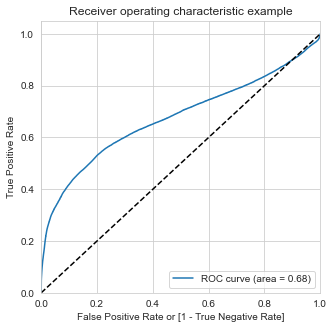

--------------------------------------------------------------------------------


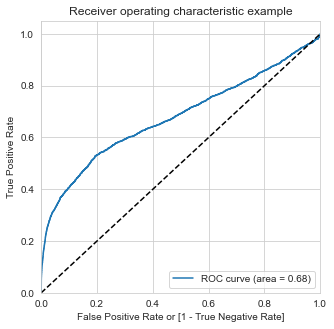

In [73]:
# Logistic regression with optimal C

eval_model_smt(logRegSmt)

# ROC on Train

yTrainPredProba = logReg.predict_proba(X_train_SMT)[:,1]

draw_roc(y_train_SMT, yTrainPredProba)

print('--'*40)

# ROC on Test

yTrainPredProba = logReg.predict_proba(X_test)[:,1]

draw_roc(y_test, yTrainPredProba)

#### Logistic regression on ADASYN


In [74]:
logRegAda = LogisticRegression()

In [77]:
#perform Hyperparameter tuning

params_logreg = {'C' : [0.001, 0.01, 0.1, 1, 10, 100],
                "penalty" : ["l2"]}

lgReg_CV_Ada = GridSearchCV(estimator=logRegAda,
                       param_grid= params_logreg,
                       scoring= 'recall',
                       n_jobs=-1,
                       cv=5,
                       verbose=1,
                       return_train_score=True)

lgReg_CV_Ada.fit(X_train_ada, y_train_ada)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l2']},
             return_train_score=True, scoring='recall', verbose=1)

In [78]:
# Printing the best parameters
print(lgReg_CV_Ada.best_score_)
print(lgReg_CV_Ada.best_params_)
print(lgReg_CV_Ada.best_estimator_)
print(lgReg_CV_Ada.best_index_)
lg_cvResults = pd.DataFrame(lgReg_CV_Ada.cv_results_)

0.840407235597279
{'C': 0.1, 'penalty': 'l2'}
LogisticRegression(C=0.1)
2


In [79]:
lg_cvResults

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,39.451025,0.911122,0.678146,0.093720,0.001,l2,"{'C': 0.001, 'penalty': 'l2'}",0.840475,0.834471,0.852729,...,0.836391,0.012326,4,0.849187,0.831624,0.845668,0.833056,0.829743,0.837855,0.007964
1,39.604078,1.607180,0.748713,0.299340,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.831991,0.838054,0.838414,...,0.834329,0.006735,5,0.841552,0.832268,0.832624,0.836211,0.828175,0.834166,0.004485
2,41.461166,1.403896,0.724800,0.177491,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.837579,0.848919,0.844101,...,0.840407,0.009650,1,0.847538,0.843690,0.838844,0.836179,0.837976,0.840845,0.004169
3,41.388339,1.743544,0.811319,0.272488,1,l2,"{'C': 1, 'penalty': 'l2'}",0.835320,0.837944,0.846510,...,0.837989,0.009349,3,0.845787,0.833502,0.843186,0.838075,0.837678,0.839646,0.004344
4,38.943551,7.759890,0.870443,0.669770,10,l2,"{'C': 10, 'penalty': 'l2'}",0.834544,0.844234,0.847419,...,0.838377,0.008644,2,NaN,0.839640,NaN,0.836345,0.828566,NaN,NaN
5,9.305787,9.793726,0.079648,0.099156,100,l2,"{'C': 100, 'penalty': 'l2'}",0.840890,NaN,NaN,...,NaN,NaN,6,0.850603,NaN,NaN,NaN,0.837050,NaN,NaN


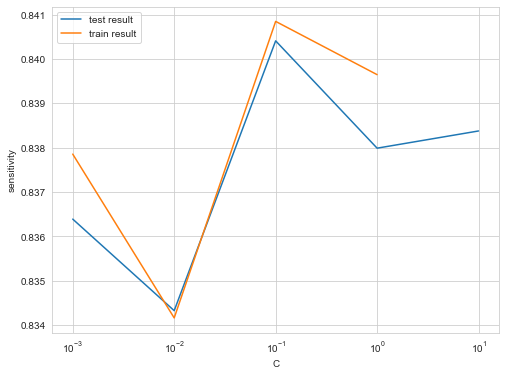

In [80]:
# plot of C versus train and validation scores
plt.figure(figsize=(8, 6))
plt.plot(lg_cvResults['param_C'], lg_cvResults['mean_test_score'])
plt.plot(lg_cvResults['param_C'], lg_cvResults['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

Train set perforance
accuracy_score - 	 0.8485849568718163
recall_score - 	 0.8358696109638076
f1_score - 	 0.8466693815551374
confusion_matrix - 
 [[777259 125159]
 [148193 754705]]
--------------------------------------------------------------------------------
Test set perforance
accuracy_score - 	 0.8601321840705599
recall_score - 	 0.6878330373001776
f1_score - 	 0.053871702575338645
confusion_matrix - 
 [[333045  53706]
 [   703   1549]]


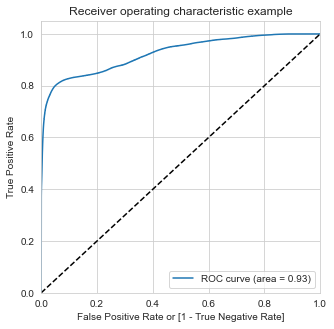

--------------------------------------------------------------------------------


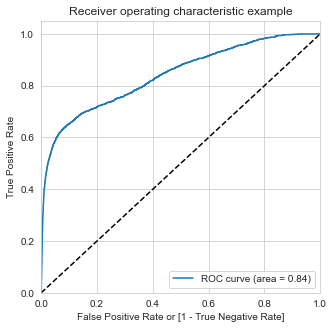

In [81]:
# Logistic regression with optimal C

logRegAda = LogisticRegression(C=0.001, penalty= 'l2')
logRegAda.fit(X_train_ada, y_train_ada)

eval_model_ada(logRegAda)

# ROC on Train

yTrainPredProba = logRegAda.predict_proba(X_train_ada)[:,1]

draw_roc(y_train_ada, yTrainPredProba)

print('--'*40)

# ROC on Test

yTrainPredProba = logRegAda.predict_proba(X_test)[:,1]

draw_roc(y_test, yTrainPredProba)

#### >Not a single sampling result give a better result in Logistic regression

In [82]:
df.head(2)

,trans_date_trans_time,cc_num,merchant,amt,first,last,gender,street,city,state,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",4.97,Jennifer,Banks,1,561 Perry Cove,Moravian Falls,NC,...,0,0,0,0,1,0,0,0,0,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",107.23,Stephanie,Gill,1,43039 Riley Greens Suite 393,Orient,WA,...,1,0,0,0,0,0,0,0,0,0


In [83]:
X_train.head()

,amt,gender,city_pop,cust_age,month,hour,weekday,category_entertainment,category_food_dining,category_gas_transport,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
192318,5.297667,1,8.312381,44,4,23,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
318906,2.613740,1,5.572154,63,6,12,6,0,0,0,...,0,0,0,1,0,0,0,0,0,0
212432,3.870784,1,8.485703,93,4,17,3,0,0,0,...,0,0,0,0,0,0,1,0,0,0
979043,5.056883,1,12.320544,35,2,23,5,0,0,0,...,0,0,1,0,0,0,0,0,0,0
614236,4.710611,1,5.780744,43,9,23,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


### Decision Tree classifier

In [84]:
from sklearn.tree import DecisionTreeClassifier

In [85]:
#fitting the model
dt= DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [87]:
# Decision trees visualisation Library
from sklearn.tree import plot_tree

In [90]:
# Creating helper functions to evaluate model performance and help plot the decision tree
def getDtGraphs(dt_classifiers):
    plt.figure(figsize=(60,30))

    graph = plot_tree(decision_tree=dt_classifiers, 
                      feature_names=X_train.columns, 
                      filled=True, rounded=True, 
                      precision=2, 
                      class_names=['fraudulent', 'non-fraudulent'])
    plt.show()
    return graph

In [89]:
gsCV = GridSearchCV(estimator=dt,
            param_grid=params,
            n_jobs=-1,
            cv=5,
            verbose=1,
            scoring='accuracy')

In [91]:
%%time
gsCV.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Wall time: 1min 3s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [7],
                         'min_samples_leaf': [40, 45, 50, 55, 60, 65]},
             scoring='accuracy', verbose=1)

In [93]:
gsCV.cv_results_

{'mean_fit_time': array([6.9507297 , 6.96283689, 6.83200078, 7.53299918, 7.60999918,
        7.86999979, 7.61899643, 7.80739961, 7.50419774, 7.40439725,
        7.37399826, 5.52405877]),
 'std_fit_time': array([0.39067531, 0.21529916, 0.05144693, 0.34900923, 0.11892945,
        0.14828627, 0.22042031, 0.16431186, 0.07809371, 0.23002515,
        0.13298421, 1.0183158 ]),
 'mean_score_time': array([0.08140044, 0.10540004, 0.12200027, 0.10119972, 0.1161994 ,
        0.12419991, 0.10539947, 0.11820102, 0.10740185, 0.10820184,
        0.1008007 , 0.05884843]),
 'std_score_time': array([0.00484114, 0.01146385, 0.02737806, 0.00470729, 0.0196105 ,
        0.03170193, 0.01321529, 0.01205928, 0.01895974, 0.01085176,
        0.00947346, 0.01635577]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', 'gini', 'gini', 'gini',
                    'entropy', 'entropy', 'entropy', 'entropy', 'entropy',
                    'entropy'],
              mask=[False, False, False, False, False, F

In [94]:
# you can fit the above results in a different data set 
result = pd.DataFrame(gsCV.cv_results_)
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,6.950730,0.390675,0.081400,0.004841,gini,7,40,"{'criterion': 'gini', 'max_depth': 7, 'min_sam...",0.998254,0.998149,0.998111,0.998232,0.998287,0.998206,0.000066,1
1,6.962837,0.215299,0.105400,0.011464,gini,7,45,"{'criterion': 'gini', 'max_depth': 7, 'min_sam...",0.998193,0.998138,0.997984,0.998155,0.998270,0.998148,0.000094,2
2,6.832001,0.051447,0.122000,0.027378,gini,7,50,"{'criterion': 'gini', 'max_depth': 7, 'min_sam...",0.998122,0.998011,0.997967,0.998111,0.998243,0.998091,0.000096,3
3,7.532999,0.349009,0.101200,0.004707,gini,7,55,"{'criterion': 'gini', 'max_depth': 7, 'min_sam...",0.998089,0.998017,0.997962,0.998122,0.998243,0.998086,0.000096,4
4,7.609999,0.118929,0.116199,0.019611,gini,7,60,"{'criterion': 'gini', 'max_depth': 7, 'min_sam...",0.998083,0.997995,0.997901,0.998122,0.998237,0.998068,0.000114,5


In [95]:
# so this is best parameters selected by the model
gsCV.best_params_

#lets instanciate it
best_CV = gsCV.best_estimator_
best_CV

DecisionTreeClassifier(max_depth=7, min_samples_leaf=40, random_state=42)

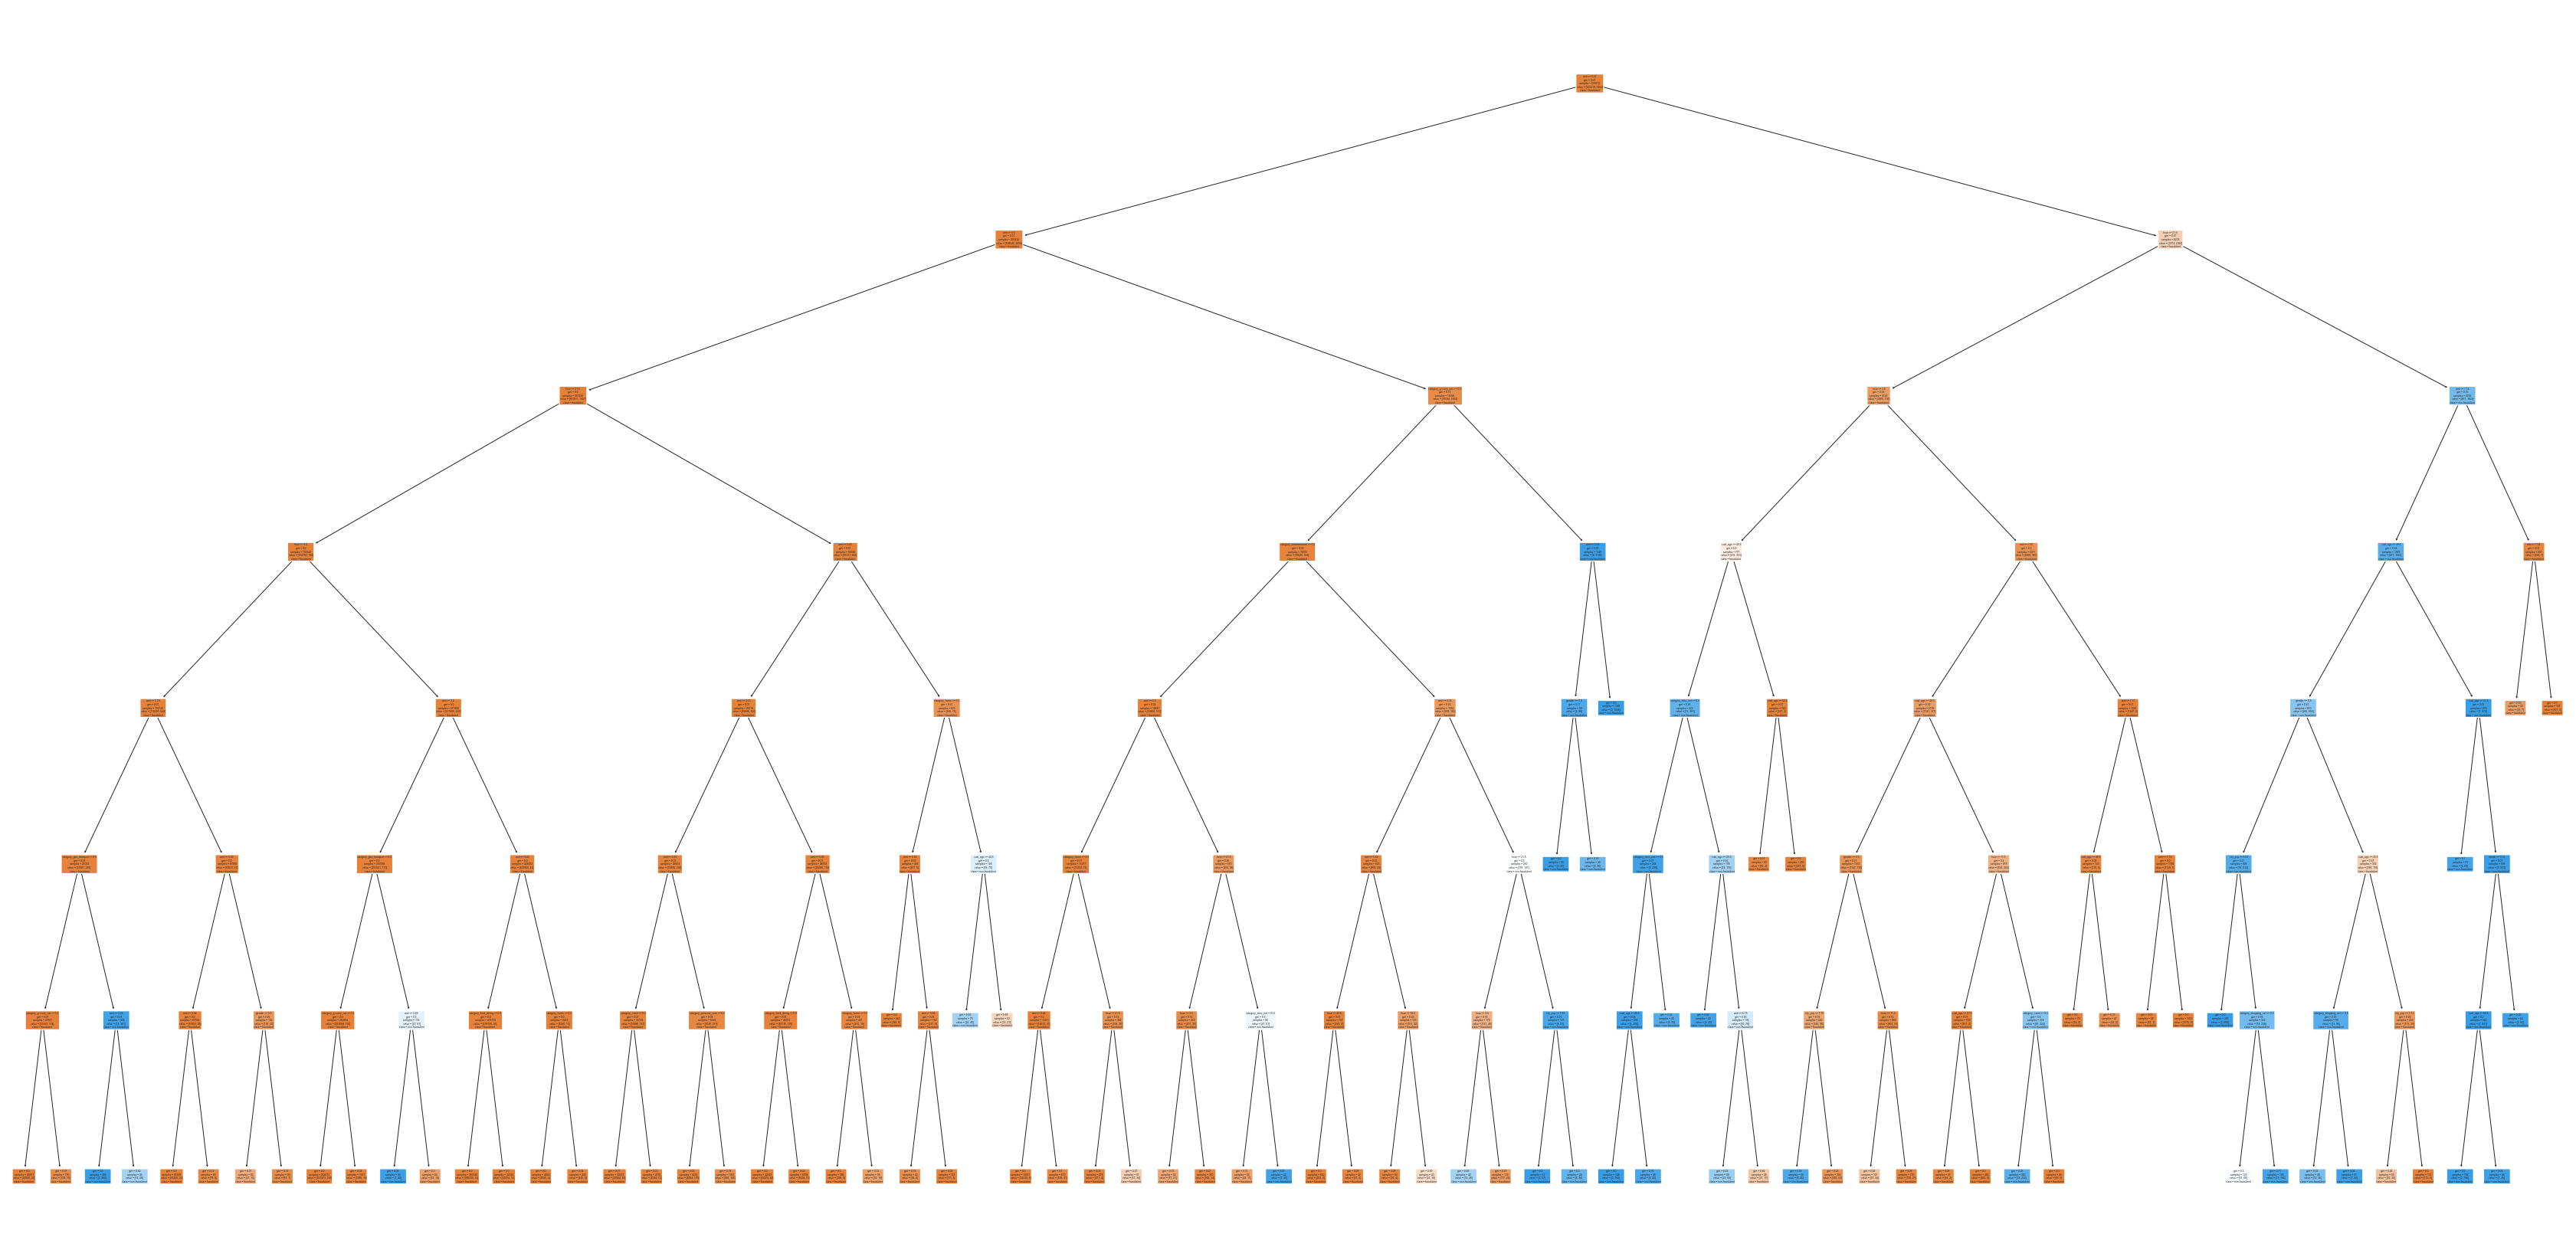

In [96]:
getDtGraphs(best_CV)
plt.show()

Train set perforance
accuracy_score - 	 0.998316572506368
recall_score - 	 0.7569470879330035
f1_score - 	 0.8388525627504747
confusion_matrix - 
 [[902167    251]
 [  1277   3977]]
--------------------------------------------------------------------------------
Test set perforance
accuracy_score - 	 0.9982905016156688
recall_score - 	 0.7526642984014209
f1_score - 	 0.8360049321824907
confusion_matrix - 
 [[386643    108]
 [   557   1695]]


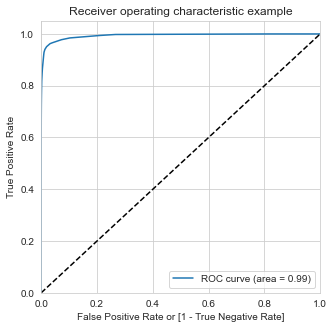

In [97]:
#Model Evaluation 

eval_model(best_CV)

# Plotting the AUC-ROC curve

dt = DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=65,random_state=42)
dt.fit(X_train, y_train)

# Predicted probability
y_train_pred_proba = dt.predict_proba(X_train)[:,1]

# Plotting the ROC curve
draw_roc(y_train, y_train_pred_proba)

#### > Decision Tree also does not giving good results.

#### Decision Tree with SMOTE sampling

In [98]:
#fitting the model
dt_SMT= DecisionTreeClassifier(random_state=42)
dt_SMT.fit(X_train_SMT,y_train_SMT)

DecisionTreeClassifier(random_state=42)

In [99]:
gsCV_SMT = GridSearchCV(estimator=dt_SMT,
            param_grid=params,
            n_jobs=-1,
            cv=5,
            verbose=1,
            scoring='accuracy')

In [100]:
%%time
gsCV_SMT.fit(X_train_SMT, y_train_SMT)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Wall time: 2min 21s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [7],
                         'min_samples_leaf': [40, 45, 50, 55, 60, 65]},
             scoring='accuracy', verbose=1)

In [101]:
# you can fit the above results in a different data set 
result_SMT = pd.DataFrame(gsCV_SMT.cv_results_)
result_SMT.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,17.342229,0.162329,0.320000,0.042129,gini,7,40,"{'criterion': 'gini', 'max_depth': 7, 'min_sam...",0.943760,0.942685,0.942335,0.942333,0.943169,0.942856,0.000546,3
1,17.354415,0.401583,0.256551,0.045199,gini,7,45,"{'criterion': 'gini', 'max_depth': 7, 'min_sam...",0.943760,0.942676,0.942327,0.942316,0.943169,0.942850,0.000551,4
2,17.375827,0.474487,0.236525,0.031765,gini,7,50,"{'criterion': 'gini', 'max_depth': 7, 'min_sam...",0.943812,0.942668,0.942374,0.942313,0.943131,0.942860,0.000557,2
3,16.957324,0.278501,0.243601,0.019583,gini,7,55,"{'criterion': 'gini', 'max_depth': 7, 'min_sam...",0.943762,0.942668,0.942374,0.942311,0.943194,0.942862,0.000548,1
4,16.643769,0.213886,0.233200,0.026499,gini,7,60,"{'criterion': 'gini', 'max_depth': 7, 'min_sam...",0.943762,0.942660,0.942341,0.942272,0.943161,0.942839,0.000558,5


In [102]:
# so this is best parameters selected by the model
gsCV_SMT.best_params_

#lets instanciate it
best_CV_SMT = gsCV_SMT.best_estimator_
best_CV_SMT

DecisionTreeClassifier(max_depth=7, min_samples_leaf=55, random_state=42)

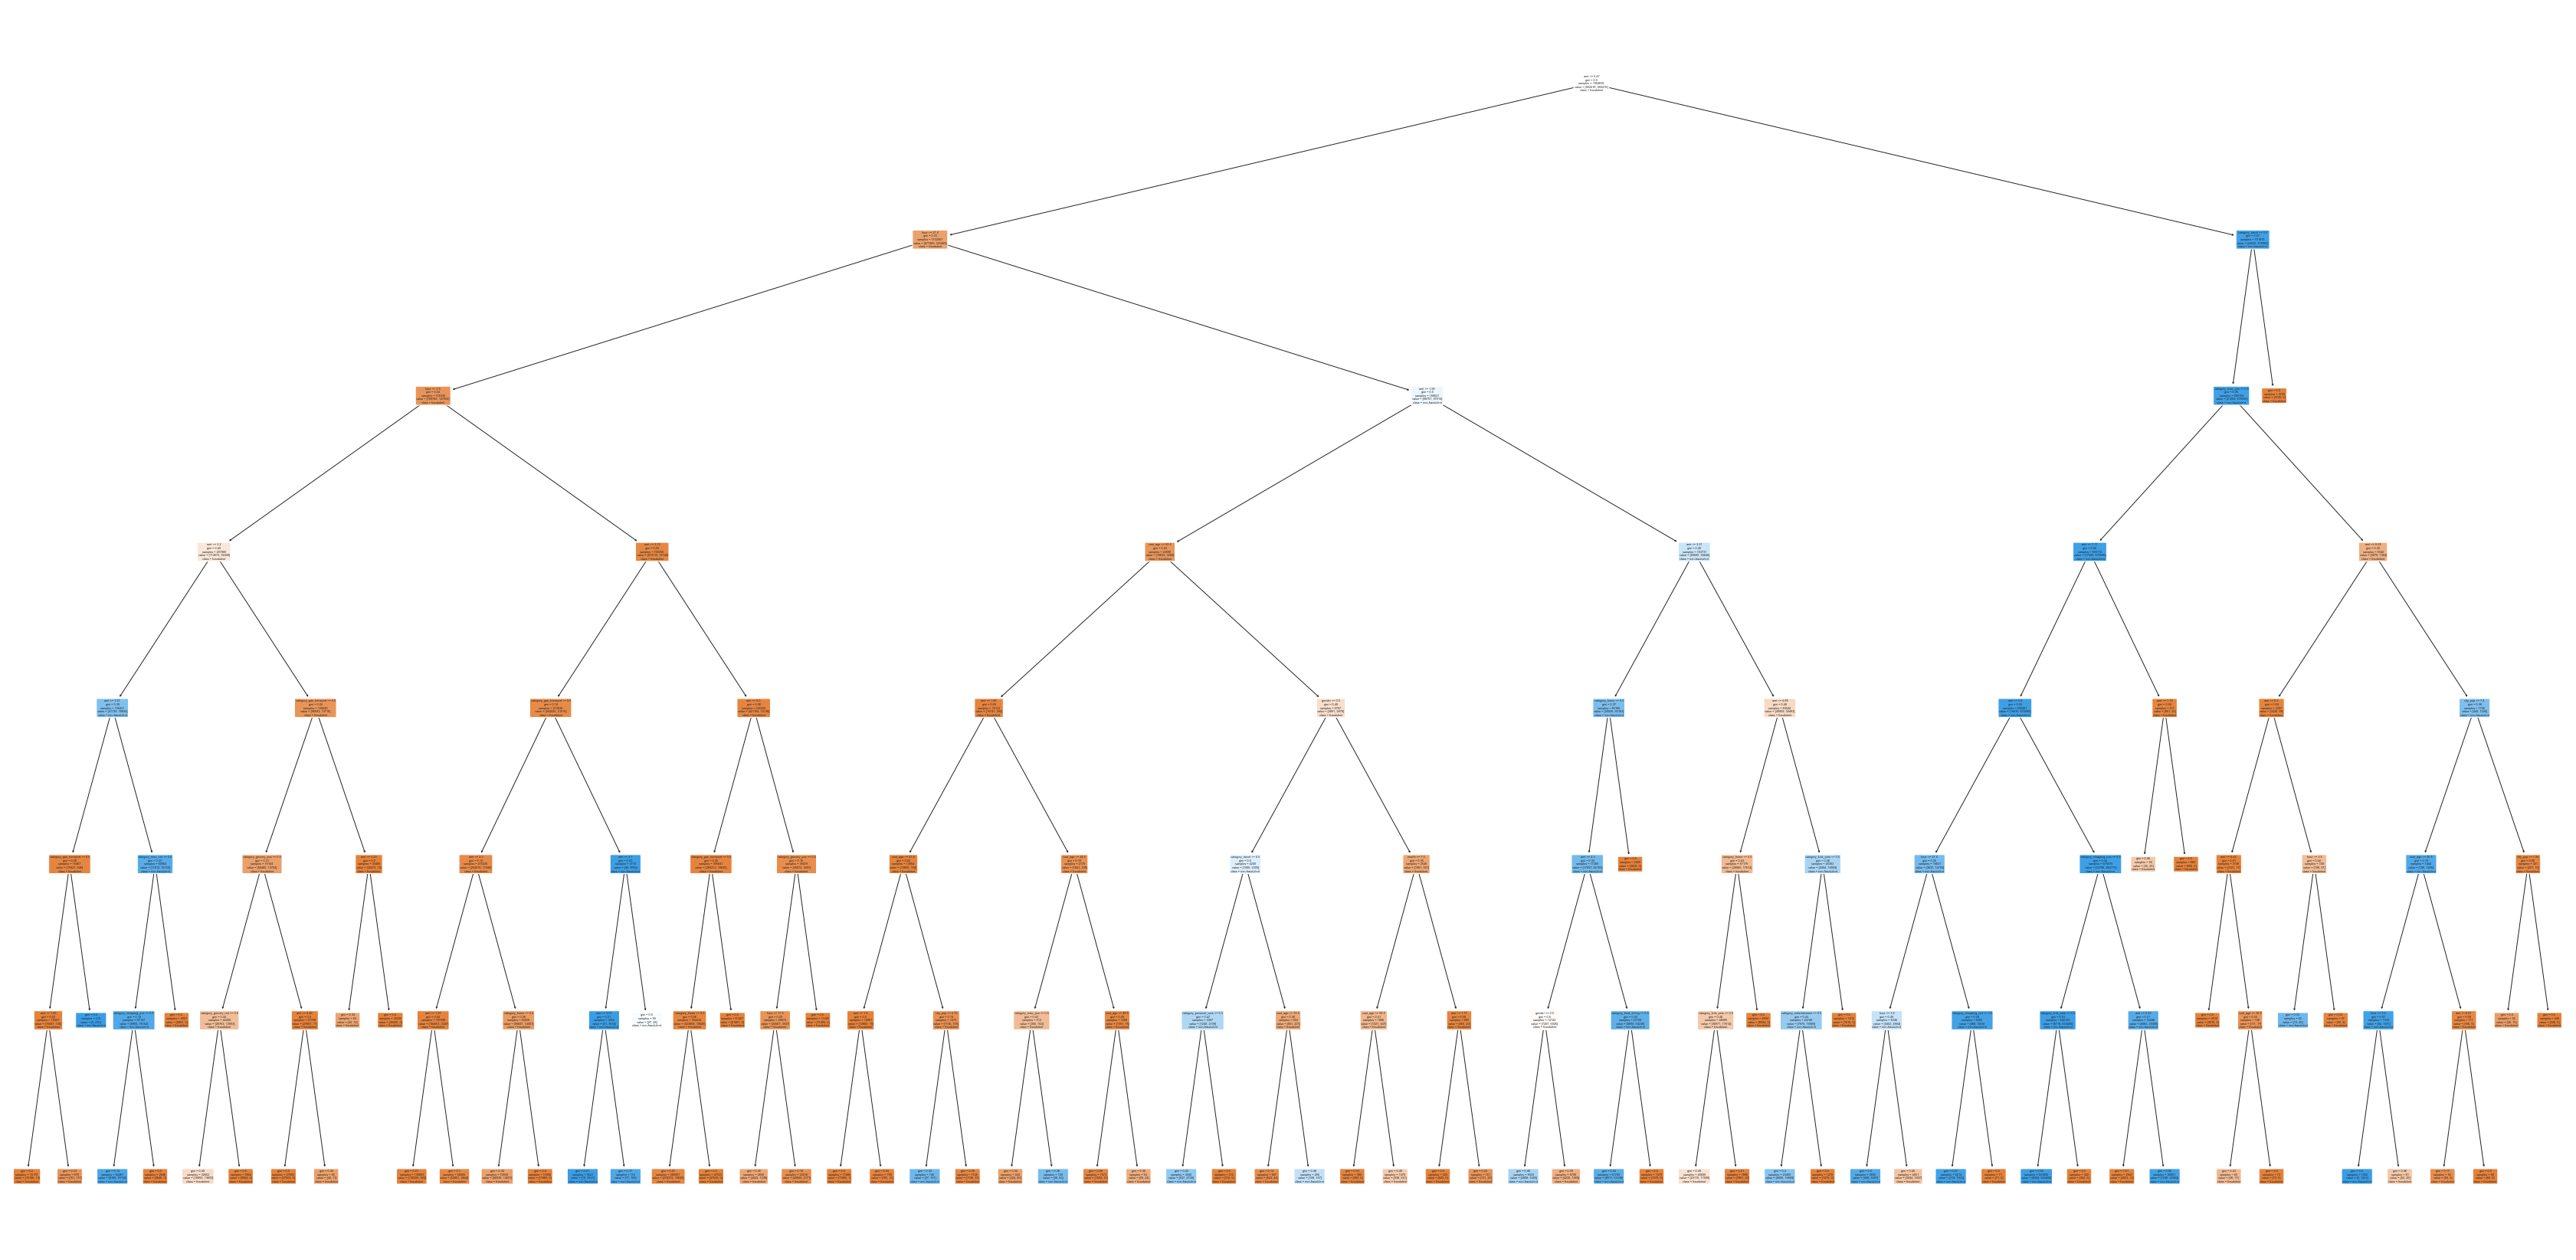

In [103]:
getDtGraphs(best_CV_SMT)
plt.show()

Train set perforance
accuracy_score - 	 0.9429649009660711
recall_score - 	 0.9257251074335839
f1_score - 	 0.9419643788397386
confusion_matrix - 
 [[866506  35912]
 [ 67027 835391]]
--------------------------------------------------------------------------------
Test set perforance
accuracy_score - 	 0.9601828263535243
recall_score - 	 0.9307282415630551
f1_score - 	 0.21299730704740613
confusion_matrix - 
 [[371418  15333]
 [   156   2096]]


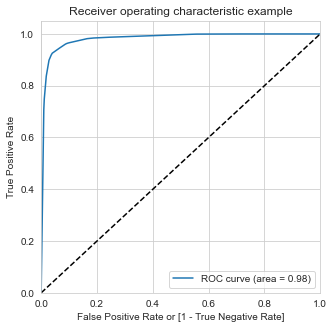

In [104]:
eval_model_smt(best_CV_SMT)

# Plotting the AUC-ROC curve

dt_smt = DecisionTreeClassifier(max_depth=7, min_samples_leaf=55, random_state=42)
dt_smt.fit(X_train_SMT, y_train_SMT)

# Predicted probability
y_train_SMT_pred_proba = dt_smt.predict_proba(X_train_SMT)[:,1]

# Plotting the ROC curve
draw_roc(y_train_SMT, y_train_SMT_pred_proba)

#### > Decision tree using SMOTE oversampling gives favourably better result than Decision tree on Train data.

### Decision Tree with Adasyn sampling 

In [105]:
dt_ada = DecisionTreeClassifier(random_state=42)
dt_ada.fit(X_train_ada, y_train_ada)

DecisionTreeClassifier(random_state=42)

In [106]:
gsCV_ada = GridSearchCV(estimator=dt_ada,
            param_grid=params,
            n_jobs=-1,
            cv=5,
            verbose=1,
            scoring='accuracy')

In [107]:
%%time
gsCV_ada.fit(X_train_ada, y_train_ada)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Wall time: 2min 18s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [7],
                         'min_samples_leaf': [40, 45, 50, 55, 60, 65]},
             scoring='accuracy', verbose=1)

In [108]:
# you can fit the above results in a different data set 
result_ada = pd.DataFrame(gsCV_ada.cv_results_)
result_ada.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,15.163802,0.289102,0.307265,0.044580,gini,7,40,"{'criterion': 'gini', 'max_depth': 7, 'min_sam...",0.934682,0.934017,0.917122,0.919194,0.929101,0.926823,0.007362,1
1,15.990011,0.983120,0.263806,0.038320,gini,7,45,"{'criterion': 'gini', 'max_depth': 7, 'min_sam...",0.934629,0.933967,0.917109,0.919114,0.929101,0.926784,0.007362,2
2,16.979602,0.377164,0.244801,0.019662,gini,7,50,"{'criterion': 'gini', 'max_depth': 7, 'min_sam...",0.934629,0.933948,0.916904,0.919114,0.929101,0.926739,0.007412,3
3,16.635014,0.356614,0.251706,0.021747,gini,7,55,"{'criterion': 'gini', 'max_depth': 7, 'min_sam...",0.934629,0.933948,0.916882,0.919106,0.929101,0.926733,0.007419,4
4,16.590641,0.426327,0.276001,0.035553,gini,7,60,"{'criterion': 'gini', 'max_depth': 7, 'min_sam...",0.934607,0.933948,0.916868,0.919006,0.929054,0.926696,0.007436,5


In [109]:
# so this is best parameters selected by the model
gsCV_ada.best_params_

#lets instanciate it
best_CV_ada = gsCV_ada.best_estimator_
best_CV_ada

DecisionTreeClassifier(max_depth=7, min_samples_leaf=40, random_state=42)

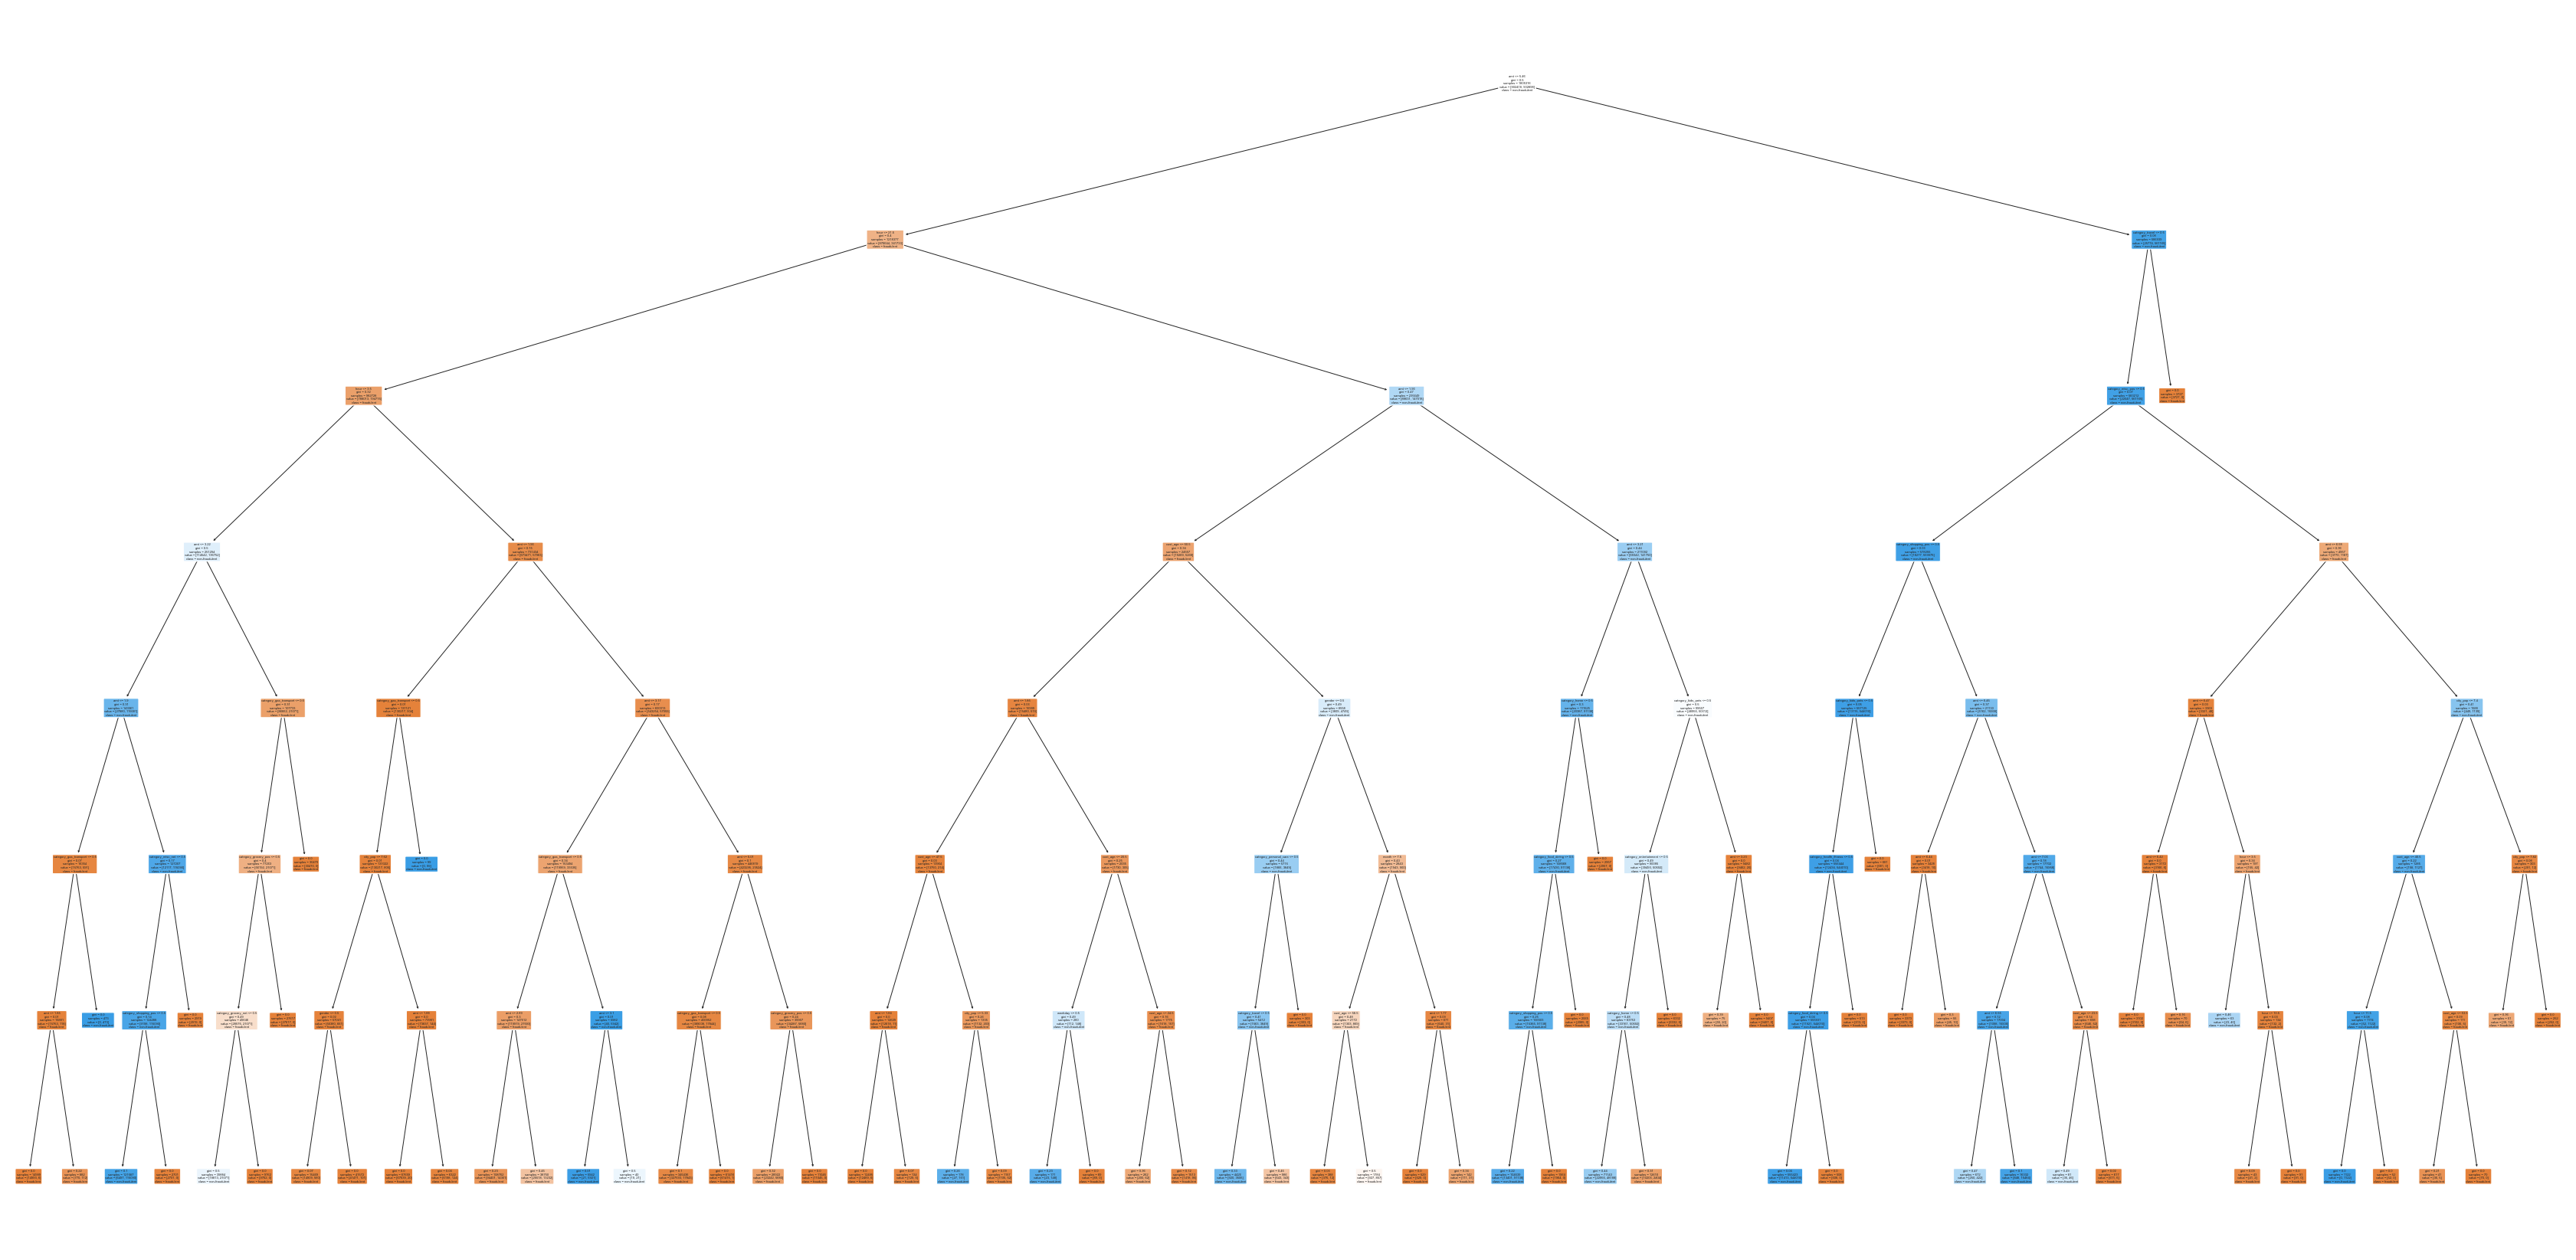

In [110]:
getDtGraphs(best_CV_ada)
plt.show()

Train set perforance
accuracy_score - 	 0.9273185414631012
recall_score - 	 0.9380129316932809
f1_score - 	 0.9281053415397631
confusion_matrix - 
 [[827173  75245]
 [ 55968 846930]]
--------------------------------------------------------------------------------
Test set perforance
accuracy_score - 	 0.9166613110952871
recall_score - 	 0.9573712255772646
f1_score - 	 0.11739402684381041
confusion_matrix - 
 [[354428  32323]
 [    96   2156]]


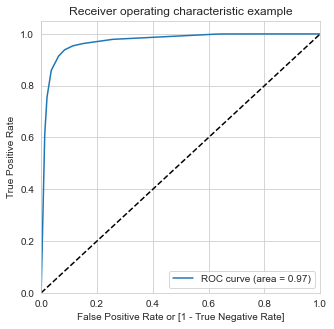

In [111]:
eval_model_ada(best_CV_ada)

# Plotting the AUC-ROC curve

dt_ada = DecisionTreeClassifier(max_depth=7, min_samples_leaf=40, random_state=42)
dt_ada.fit(X_train_ada, y_train_ada)

# Predicted probability
y_train_ada_pred_proba = dt_ada.predict_proba(X_train_ada)[:,1]

# Plotting the ROC curve
draw_roc(y_train_ada, y_train_ada_pred_proba)

#### The test result improved from the train data but decision tree using ADASYN sampling is not giving better result than decision tree using SMOTE sampling.
So we can conclude that in decision tree model SMOTE sampling is giving better result.

# XGBoost : Extreme Gradient Boosting

In [112]:
from xgboost import XGBClassifier

In [113]:
# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
xgb_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = 5, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
xgb_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[01:11:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:12:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:12:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:13:19]

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=No

In [114]:
# cross validation results
cv_results = pd.DataFrame(xgb_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,34.911825,1.790900,0.207599,0.014485,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.995886,0.993663,0.991851,...,0.993684,0.001870,1,0.994624,0.994754,0.995135,0.995175,0.995004,0.994938,0.000215
1,41.956255,5.996194,0.198851,0.018980,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.995724,0.994950,0.992614,...,0.993681,0.002183,2,0.994586,0.995395,0.993689,0.995645,0.994742,0.994811,0.000686
2,39.848327,1.167996,0.227095,0.010621,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.994567,0.994388,0.992426,...,0.993129,0.001683,3,0.994064,0.995207,0.996032,0.995089,0.993629,0.994804,0.000858
3,40.251613,1.016674,0.231204,0.008111,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.995545,0.910680,0.912449,...,0.961838,0.041052,5,0.995822,0.899710,0.913666,0.997281,0.997064,0.960709,0.044331
4,38.820390,4.386552,0.199600,0.010288,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.997335,0.977329,0.976536,...,0.988661,0.009599,4,0.997602,0.975911,0.980822,0.997501,0.997867,0.989941,0.009578
5,35.022490,1.184845,0.182200,0.012859,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.663443,0.997107,0.996992,...,0.927432,0.132069,6,0.658944,0.998041,0.998199,0.998233,0.979356,0.926554,0.134003


In [116]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", xgb_cv.best_score_)
print(xgb_cv.best_estimator_)
print(xgb_cv.best_params_)

Best roc auc score :  0.993684414693365
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.3,
              tree_method='exact', validate_parameters=1, verbosity=None)
{'learning_rate': 0.2, 'subsample': 0.3}


In [117]:
# XGboost model with optimal hyperparameter

xgb_param = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
          'objective':'binary:logistic'}

# fit model on training data
xgb_imb_model = XGBClassifier(params = xgb_param)
xgb_imb_model.fit(X_train, y_train)

[01:32:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[01:32:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

Train set perforance
accuracy_score - 	 0.9992794754052124
recall_score - 	 0.8873239436619719
f1_score - 	 0.9344558027660854
confusion_matrix - 
 [[902356     62]
 [   592   4662]]
--------------------------------------------------------------------------------
Test set perforance
accuracy_score - 	 0.998935740855469
recall_score - 	 0.8468028419182948
f1_score - 	 0.902081362346263
confusion_matrix - 
 [[386682     69]
 [   345   1907]]


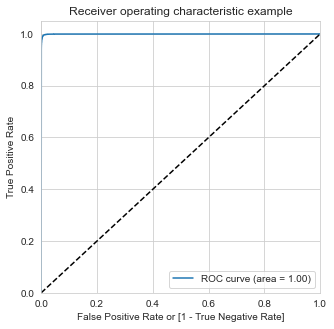

Train
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -


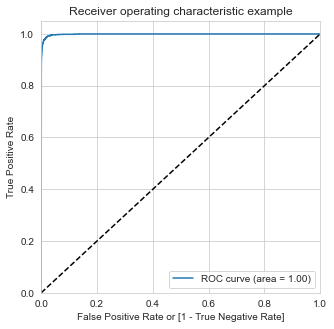

Test


In [118]:
# evaluate the model
eval_model(xgb_imb_model)

# Plotting the AUC-ROC curve
# Predicted probability on train data
y_train_xgb_pred_proba = xgb_imb_model.predict_proba(X_train)[:,1]

# Plotting the ROC curve on train data
draw_roc(y_train, y_train_xgb_pred_proba)
print('Train')

print('- -'*40)

# Predicted probability on test data
y_test_xgb_pred_proba = xgb_imb_model.predict_proba(X_test)[:,1]

# Plotting the ROC curve on test data
draw_roc(y_test, y_test_xgb_pred_proba)
print('Test')

#### XGboost with SMOTE

In [ ]:
# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, 
                          n_estimators=200)


xgb_cv_SMT = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = 5, 
                        verbose = 1,
                        return_train_score=True)      

# fitting the model
xgb_cv_SMT.fit(X_train_SMT, y_train_SMT)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[01:34:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:35:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:37:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:38:23]

In [122]:
# cross validation results
cv_results_SMT = pd.DataFrame(xgb_cv_SMT.cv_results_)
cv_results_SMT

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,73.320182,2.927017,0.335622,0.015217,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.998693,0.998773,0.998734,...,0.998730,0.000042,4,0.998880,0.998715,0.998760,0.998786,0.998580,0.998744,0.000098
1,78.672572,2.182078,0.334542,0.009507,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.998594,0.998199,0.998575,...,0.998571,0.000200,6,0.998792,0.998134,0.998601,0.998758,0.998644,0.998586,0.000237
2,75.654471,0.368204,0.338057,0.023074,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.998579,0.998622,0.998689,...,0.998670,0.000072,5,0.998785,0.998552,0.998709,0.998672,0.998702,0.998684,0.000076
3,69.464066,0.274138,0.339298,0.006331,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999635,0.999725,0.999689,...,0.999698,0.000036,1,0.999745,0.999704,0.999702,0.999698,0.999697,0.999709,0.000018
4,78.776677,2.843760,0.349816,0.014842,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999585,0.999738,0.999702,...,0.999673,0.000073,3,0.999710,0.999713,0.999716,0.999594,0.999719,0.999690,0.000048
5,75.832904,0.424793,0.349413,0.026543,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999609,0.999656,0.999698,...,0.999685,0.000048,2,0.999724,0.999587,0.999708,0.999721,0.999701,0.999688,0.000051


In [125]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", xgb_cv_SMT.best_score_)
print(xgb_cv_SMT.best_estimator_)
print(xgb_cv_SMT.best_params_)

Best roc auc score :  0.9996983969790045
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.6, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.3,
              tree_method='exact', validate_parameters=1, verbosity=None)
{'learning_rate': 0.6, 'subsample': 0.3}


In [126]:
# XGboost model with optimal hyperparameter

xgb_param = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
          'objective':'binary:logistic'}

# fit model on training data
xgb_imb_model_SMT = XGBClassifier(params = xgb_param)
xgb_imb_model_SMT.fit(X_train, y_train)

[02:15:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:15:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

Train set perforance
accuracy_score - 	 0.8371198269538064
recall_score - 	 0.6743083582109399
f1_score - 	 0.8054438552787977
confusion_matrix - 
 [[902356     62]
 [293910 608508]]
--------------------------------------------------------------------------------
Test set perforance
accuracy_score - 	 0.998935740855469
recall_score - 	 0.8468028419182948
f1_score - 	 0.902081362346263
confusion_matrix - 
 [[386682     69]
 [   345   1907]]


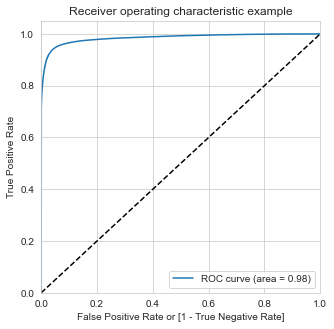

Train
--------------------------------------------------------------------------------


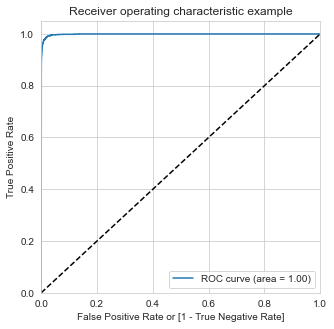

Test


In [127]:
# evaluate the model
eval_model_smt(xgb_imb_model_SMT)

# Plotting the AUC-ROC curve
# Predicted probability on train data
y_train_xgb_pred_proba = xgb_imb_model_SMT.predict_proba(X_train_SMT)[:,1]

# Plotting the ROC curve on train data
draw_roc(y_train_SMT, y_train_xgb_pred_proba)
print('Train')

print('--'*40)

# Predicted probability on test data
y_test_xgb_pred_proba = xgb_imb_model_SMT.predict_proba(X_test)[:,1]

# Plotting the ROC curve on test data
draw_roc(y_test, y_test_xgb_pred_proba)
print('Test')

#### XGboost with ADASYN

In [ ]:
# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, 
                          n_estimators=200)


xgb_cv_ada = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = 5, 
                        verbose = 1,
                        return_train_score=True)      

# fitting the model
xgb_cv_ada.fit(X_train_ada, y_train_ada)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[02:16:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:17:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:19:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:20:08]

In [129]:
# cross validation results
cv_results_ada = pd.DataFrame(xgb_cv_ada.cv_results_)
cv_results_ada

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,66.481601,0.625881,0.315082,0.003845,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.998648,0.998681,0.997351,...,0.998246,0.000503,4,0.998399,0.998478,0.998340,0.998573,0.998340,0.998426,0.000089
1,74.154189,0.430882,0.319829,0.003556,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.998596,0.998564,0.997407,...,0.998131,0.000469,6,0.998369,0.998298,0.998292,0.998321,0.998106,0.998277,0.000090
2,73.124375,0.671200,0.321431,0.007023,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.998707,0.998529,0.997702,...,0.998237,0.000389,5,0.998481,0.998258,0.998463,0.998403,0.998225,0.998366,0.000105
3,66.559174,0.956940,0.340420,0.009800,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999480,0.999531,0.999342,...,0.999467,0.000075,1,0.999518,0.999577,0.999612,0.999644,0.999592,0.999589,0.000042
4,77.305996,3.671852,0.344936,0.020996,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999474,0.999564,0.999196,...,0.999394,0.000158,2,0.999545,0.999584,0.999521,0.999524,0.999509,0.999536,0.000026
5,72.899417,0.334451,0.328009,0.005615,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999057,0.999442,0.999260,...,0.999339,0.000170,3,0.999403,0.999495,0.999522,0.999635,0.999602,0.999531,0.000082


In [130]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", xgb_cv_ada.best_score_)
print(xgb_cv_ada.best_estimator_)
print(xgb_cv_ada.best_params_)

Best roc auc score :  0.999466528563944
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.6, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.3,
              tree_method='exact', validate_parameters=1, verbosity=None)
{'learning_rate': 0.6, 'subsample': 0.3}


In [131]:
# XGboost model with optimal hyperparameter

xgb_param_ada = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
          'objective':'binary:logistic'}

# fit model on training data
xgb_imb_model_ada = XGBClassifier(params = xgb_param_ada)
xgb_imb_model_ada.fit(X_train_ada, y_train_ada)

[02:55:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:55:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6},
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

Train set perforance
accuracy_score - 	 0.9976663365305576
recall_score - 	 0.9985070295869523
f1_score - 	 0.9976689151242757
confusion_matrix - 
 [[899553   2865]
 [  1348 901550]]
--------------------------------------------------------------------------------
Test set perforance
accuracy_score - 	 0.9959897481510426
recall_score - 	 0.9160746003552398
f1_score - 	 0.7256419275413296
confusion_matrix - 
 [[385380   1371]
 [   189   2063]]


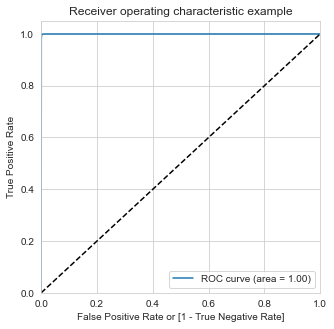

Train
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -


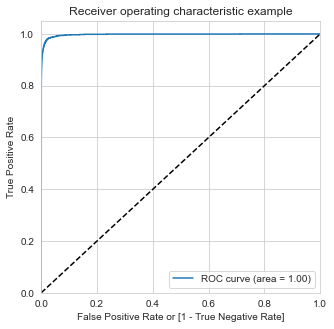

Test


In [132]:
# evaluate the model
eval_model_ada(xgb_imb_model_ada)

# Plotting the AUC-ROC curve
# Predicted probability on train data
y_train_xgb_pred_proba = xgb_imb_model_ada.predict_proba(X_train_ada)[:,1]

# Plotting the ROC curve on train data
draw_roc(y_train_ada, y_train_xgb_pred_proba)
print('Train')

print('- -'*40)

# Predicted probability on test data
y_test_xgb_pred_proba = xgb_imb_model_ada.predict_proba(X_test)[:,1]

# Plotting the ROC curve on test data
draw_roc(y_test, y_test_xgb_pred_proba)
print('Test')

## Summary 

 Models considered
   1. Logistic regression model
   2. Decision tree model
   3. XGboost model

Sampling Technique
    
    1. SMOTE
    2. ADASYN
    
NOTE:- 
     
     1.  Models are tested without sampling also 
      2. Total Models:- 9

#### The Best Model with Perfect Score is XGBoost with ADASYN as it's sampling technique.

Score:-
For Training Data
1. Accuracy:- 0.9976
2. Recall:- 0.9985
3. f1:- 0.9976

For Test Data
1. Accuracy:- 0.9959
2. Recall:- 0.9160
3. f1:- 0.7256

Here, we have focused on getting maximum recall in order to detect actual fraudulent transactions in order to save the banks from high-value fraudulent transactions.

# Cost-Benefit Analysis

In [165]:
# Creating a new column "year_trns"
df['year_trns'] = pd.DatetimeIndex(df.trans_date_trans_time).year

# Creating a new column "year_trns"
df_Test['year_trns'] = pd.DatetimeIndex(df_Test.trans_date_trans_time).year

In [166]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'amt', 'first', 'last',
       'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop',
       'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long',
       'is_fraud', 'cust_age', 'month', 'day_name', 'hour', 'weekday',
       'category_entertainment', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'year_trns'],
      dtype='object')

In [167]:
print(df.groupby(['year_trns', 'month', 'is_fraud']).amt.sum())

year_trns  month  is_fraud
2019       1      0           3497969.65
                  1            261780.38
           2      0           3330611.15
                  1            274051.08
           3      0           4790248.81
                  1            237637.59
           4      0           4559437.29
                  1            202067.29
           5      0           4850354.21
                  1            210549.11
           6      0           5858192.82
                  1            178204.60
           7      0           5855325.15
                  1            188701.59
           8      0           5843337.52
                  1            203951.13
           9      0           4732159.05
                  1            217675.37
           10     0           4593527.65
                  1            257739.72
           11     0           4722945.12
                  1            200307.47
           12     0           9583021.64
                  1           

In [168]:
final = pd.concat([df, df_Test])

In [169]:
final.shape, df.shape, df_Test.shape

((1852394, 42), (1296675, 41), (555719, 28))

In [170]:
print(final.groupby(['year_trns', 'month', 'is_fraud']).amt.sum())

year_trns  month  is_fraud
2019       1      0           3497969.65
                  1            261780.38
           2      0           3330611.15
                  1            274051.08
           3      0           4790248.81
                  1            237637.59
           4      0           4559437.29
                  1            202067.29
           5      0           4850354.21
                  1            210549.11
           6      0           5858192.82
                  1            178204.60
           7      0           5855325.15
                  1            188701.59
           8      0           5843337.52
                  1            203951.13
           9      0           4732159.05
                  1            217675.37
           10     0           4593527.65
                  1            257739.72
           11     0           4722945.12
                  1            200307.47
           12     0           9583021.64
                  1           

# Part I: Analyse the dataset and find the following figures:
1. Average number of transactions per month
2. Average number of fraudulent transactions per month
3. Average amount per fraudulent transaction

In [173]:
# Average number of transactions on data set
avg_mon_trn = round(((final.cc_num.count())/24),2)

print('Average number of transactions per month is {}'.format(avg_mon_trn))

Average number of transactions per month is 77183.08


In [174]:
# Average number of fraudulent transactions per month
trans_per_mon = (final.loc[final.is_fraud == 1].count()[0])/24

print('Average number of fraudulent transactions per month is {}'.format(trans_per_mon))

Average number of fraudulent transactions per month is 402.125


In [175]:
# Average amount per fraudulent transaction
amt_per_mon = round((final.loc[final.is_fraud == 1].amt.sum() / (final.loc[final.is_fraud == 1].count()[0])),2)

print('Average amount per fraudulent transaction is {}'.format(amt_per_mon))

Average amount per fraudulent transaction is 530.66


### Part II: Compare the cost incurred per month by the bank before and after the model deployment:
Cost incurred per month before the model was deployed = Average amount per fraudulent transaction * Average number of fraudulent transactions per month

Cost incurred per month after the model is built and deployed: Use the test metric from the model evaluation part and the calculations performed in Part I to compute the values given below>

Let TF be the average number of transactions per month detected as fraudulent by the model and let the cost of providing customer executive support per fraudulent transaction detected by the model = $1.5

Total cost of providing customer support per month for fraudulent transactions detected by the model = 1.5 * TF.
Let FN be the average number of transactions per month that are fraudulent but not detected by the model

Cost incurred due to these fraudulent transactions left undetected by the model = Average amount per fraudulent transaction * FN

Therefore, the cost incurred per month after the model is built and deployed = 1.5*TF + Average amount per fraudulent transaction * FN

Final savings = Cost incurred before - Cost incurred after.

Note that you’re not including the model deployment cost since it will only be a one-time expenditure and you’re trying to gauge the long-term benefits of putting this model into practice.

In [199]:
# Cost incurred per month before the model was deployed = 
# Average amount per fraudulent transaction * Average number of fraudulent transactions per month

bfr = round((amt_per_mon * trans_per_mon),2)
print('Cost incurred per month before the model was deployed',bfr)

Cost incurred per month before the model was deployed 213391.65


# THANK YOU